## Look at the DESC metrics

This notebook takes the DESC metrics and plots more of them for more families. 

In [2]:
# Some useful packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython

import rubin_sim.maf as maf

The `archive` module (from `rubin_sim.maf.archive.py`) provides functions to help deal with json/pandas data frames containing lists of the simulations in a given run, as well as typical sets of metrics. With these lists of simulations in each family, it's easier to isolate those metric results to compare the effect of varying that survey strategy. `archive` works with additional functions in `summary_plots` to then normalize and plot metric summary statistics.
(`archive` and `summary_plots` are the evolution of the family_infos and metric_infos classes).

In [3]:
# Download a dataframe of the archive information -- 
# this is a multi-index DF, and can be read in in multiple "versions"
# This version of the dataframe has one row per family, with multiple runs in lists in each row
# note that you can 'explode' this dataframe to be one row per run by doing families.explode('run')
families = maf.archive.get_family_descriptions('runs_v2.1.json')
families.head()

,description,version,reference,run,brief,filepath,url
family,,,,,,,
baseline,**baseline** : The v2 baseline simulations. V2...,--,baseline_v2.1_10yrs,"[baseline_v2.1_10yrs, baseline_v2.0_10yrs, bas...","[v2.1 baseline (+Virgo, good seeing), v2.0 bas...","[baseline/baseline_v2.1_10yrs.db, baseline/bas...",[http://epyc.astro.washington.edu/~lynnej/opsi...
rolling,**rolling** : The rolling family covers a wide...,2.0,baseline_v2.0_10yrs,"[noroll_v2.0_10yrs, rolling_ns2_rw0.5_v2.0_10y...","[v2.0 baseline with no rolling, Rolling half-s...","[noroll/noroll_v2.0_10yrs.db, rolling/rolling_...",[http://epyc.astro.washington.edu/~lynnej/opsi...
triplets,**triplets** : These simulations add a third v...,2.0,baseline_v2.0_10yrs,"[presto_gap1.5_v2.0_10yrs, presto_gap2.0_v2.0_...","[Triples spaced 1.5 hours apart g+r,r+i,i+z in...","[presto/presto_gap1.5_v2.0_10yrs.db, presto/pr...",[http://epyc.astro.washington.edu/~lynnej/opsi...
long gaps no pairs,**long gaps no pairs** : The baseline survey s...,2.0,baseline_v2.0_10yrs,[long_gaps_np_nightsoff7_delayed1827_v2.0_10yr...,[Long gaps pairs every 7 nights starting after...,[long_gaps_nopair/long_gaps_np_nightsoff7_dela...,[http://epyc.astro.washington.edu/~lynnej/opsi...
bluer balance,**bluer balance** : The standard filter balanc...,2.0,baseline_v2.0_10yrs,"[bluer_indx0_v2.0_10yrs, bluer_indx1_v2.0_10yrs]","[More g - filter ratio in WFD of {'u': 0.07, '...","[bluer/bluer_indx0_v2.0_10yrs.db, bluer/bluer_...",[http://epyc.astro.washington.edu/~lynnej/opsi...


Read the summary stat csv file. 

These are the standard MAF summary stats (which may include something you use!) 
but you could join your own dataframe, as long as it covered all the relevant runs.
This gives us metric results to compare between the runs.

In [4]:
# Read the summary stat csv file
url_source = 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/summary_2022_04_23.csv'
file_source = 'summary_2022_04_23.csv'
summaries = maf.archive.get_metric_summaries(summary_source=file_source)

In [5]:
# And get the metric subset lists that can help with pulling information out of the big summary dataframe
metrics_url = "https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/metric_sets.json"
file_source = 'metric_sets.json'
metrics = maf.archive.get_metric_sets(file_source)
metrics.head()

metric  \
metric set metric                                                                                                  
radar      fONv MedianNvis fO All sky HealpixSlicer                     fONv MedianNvis fO All sky HealpixSlicer   
           Mean WeakLensingNvisits i band non-DD HealpixSl...  Mean WeakLensingNvisits i band non-DD HealpixS...   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2ptFoM ExgalM5_with_cuts i band non-DD year ...   
           Total detected SNNSNMetric_nSN  HealpixSlicer           Total detected SNNSNMetric_nSN  HealpixSlicer   
           TDEsPopMetric__some_color_pu  UserPointsSlicer         TDEsPopMetric__some_color_pu  UserPointsSlicer   

                                                              short_name  \
metric set metric                                                          
radar      fONv MedianNvis fO All sky HealpixSlicer             fONv_med   
           Mean WeakLensingNvisits i band non-DD HealpixSl...         WL   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  3x2pt FoM   
           Total detected SNNSNMetric_nSN  HealpixSlicer            SNIa   
           TDEsPopMetric__some_color_pu  UserPointsSlicer            TDE   

                                                              short_names_norm  \
metric set metric                                                                
radar      fONv MedianNvis fO All sky HealpixSlicer                   fONv_med   
           Mean WeakLensingNvisits i band non-DD HealpixSl...               WL   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...        3x2pt FoM   
           Total detected SNNSNMetric_nSN  HealpixSlicer                  SNIa   
           TDEsPopMetric__some_color_pu  UserPointsSlicer                  TDE   

                                                              style  invert  \
metric set metric                                                             
radar      fONv MedianNvis fO All sky HealpixSlicer            None   False   
           Mean WeakLensingNvisits i band non-DD HealpixSl...  None   False   
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  None   False   
           Total detected SNNSNMetric_nSN  HealpixSlicer       None   False   
           TDEsPopMetric__some_color_pu  UserPointsSlicer      None   False   

                                                                 mag  
metric set metric                                                     
radar      fONv MedianNvis fO All sky HealpixSlicer            False  
           Mean WeakLensingNvisits i band non-DD HealpixSl...  False  
           3x2ptFoM ExgalM5_with_cuts i band non-DD year 1...  False  
           Total detected SNNSNMetric_nSN  HealpixSlicer       False  
           TDEsPopMetric__some_color_pu  UserPointsSlicer      False

In [6]:
# What are the 'sets' of metrics?
metrics.groupby('metric set').first().index

Index(['Fraction Pop 3 bands', 'Fraction Pop 4 bands', 'Fraction Pop 5 bands',
       'Fraction Pop 6 bands', 'Lightcurve Inversion', 'Nvis', 'SSO NOBJ',
       'SSO discovery', 'area', 'cadence', 'descWFD', 'galaxies', 'radar',
       'short', 'srd', 'sso disc options', 'tvs'],
      dtype='object', name='metric set')

In [7]:
metrics.loc['descWFD']

,metric,short_name,short_names_norm,style,invert,mag
metric,,,,,,
Median ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Median ExgalM5_with_cuts i band non-DD year 10...,Median coaddedM5 i band,Median coaddedM5 i band,b-.,False,True
Rms ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Rms ExgalM5_with_cuts i band non-DD year 10 He...,RMS coaddedM5 i band,1 / RMS coaddedM5 i band,b:,True,False
Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band ...,Effective survey area,Effective survey area,r-,False,False
3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,3x2ptFoM ExgalM5_with_cuts i band non-DD year ...,3x2pt FoM,3x2pt FoM,r-.,False,False
N Galaxies (all) DepthLimitedNumGalaxiesMetric i band galaxies non-DD HealpixSlicer,N Galaxies (all) DepthLimitedNumGalaxiesMetric...,NGal in exgal footprint,NGal in exgal footprint,g:,False,False
Mean WeakLensingNvisits i band non-DD HealpixSlicer,Mean WeakLensingNvisits i band non-DD HealpixS...,Mean NVisits (WL),Mean NVisits (WL),m:,False,False
Total detected SNNSNMetric_nSN HealpixSlicer,Total detected SNNSNMetric_nSN HealpixSlicer,Total SNIa,Total SNIa,k-,False,False
Median SNNSNMetric_zlim HealpixSlicer,Median SNNSNMetric_zlim HealpixSlicer,Median z_lim SNIa,Median z_lim SNIa,k--,False,False
Total detected SNSLMetric HealpixSlicer,Total detected SNSLMetric HealpixSlicer,Total SN-SL,Total SN-SL,k:,False,False


### Metric results

Using utilities from `archive` (to normalize the data frame and plot metrics), combined with the family information dataframe with the simulations in each family, we can pull up some plots for each family.

In [8]:
outDir = 'desc_plots'
if not os.path.exists(outDir):
    os.mkdir(outDir)

def describe_family(family, mset=metrics.loc['descWFD']):
    if not isinstance(family, list):
        family = [family]
    baseline_run = families['reference'].loc[['baseline']].iloc[0]
    these_runs = families.explode('run').loc[family, 'run'].values
    if baseline_run not in these_runs:
        these_runs = np.concatenate([[baseline_run], these_runs])
    result = maf.archive.describe_families(
        families.loc[family, :],
        summary=summaries,
        table_metric_set=metrics.loc["short"],
        plot_metric_set=metrics.loc["area"],
        baseline_run=baseline_run,
    )
    fig, ax = maf.plot_run_metric(  # pylint: disable=invalid-name
            summaries.loc[these_runs, :], 
            metric_set=mset,
            baseline_run=baseline_run,
            vertical_quantity="value",
            horizontal_quantity="run",
            metric_label_map=mset['short_name']
        )
    lgd = plt.legend(loc=(1.01, 0.2), fancybox=True, numpoints=1, fontsize='medium')
    figwidth = min(10, len(these_runs))
    figwidth = max(figwidth, 15)
    fig.set_figwidth(figwidth)
    d = summaries.loc[these_runs, mset['metric']]
    d = d.rename(columns=mset['short_name'], inplace=False)
    return d

---
**baseline** : The v2 baseline simulations. V2.0 and V2.1 feature a survey footprint with expanded dust-free area and WFD-level visits in the Galactic Bulge and Magellanic Clouds. Coverage of the Northern Ecliptic Spur, South Celestial Pole, and remainder of the Galactic Plane is maintained, at lower levels. Filter balance is modified in different areas of the sky. A 2-region rolling cadence is used in the dust-free WFD sky, to improve cadence. The v2.1 simulation adds coverage in the Virgo cluster and acquisition of good seeing images in r&i bands. The retro simulations are intended to provide a bridge from v1.X to v2.X, introducing modifications to the footprint and scheduler code separately and in stages.  
**version**: --  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
baseline_v2.1_10yrs,"v2.1 baseline (+Virgo, good seeing)",12434.14,16842.94,2081749.0,838.0,54.0,68.0,179.0,181.0,159.0,165.0
baseline_v2.0_10yrs,v2.0 baseline,12893.23,16711.18,2086980.0,839.0,54.0,70.0,178.0,180.0,160.0,166.0
baseline_retrofoot_v2.0_10yrs,v1.x footprint but new code capabilities,17510.18,14959.57,2086534.0,875.0,56.0,79.0,185.0,188.0,166.0,173.0
retro_baseline_v2.0_10yrs,v1.x baseline with rubin_sim (without new code capabilities),14611.26,15095.54,2048566.0,848.0,53.0,74.0,180.0,180.0,161.0,172.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.200,7.748698
baseline_v2.0_10yrs,26.183049,0.111224,16711.175770,37.908126,4.568638e+09,185.960323,25374.969,0.225,8.116086
baseline_retrofoot_v2.0_10yrs,26.214487,0.111908,14959.569932,33.991288,4.094741e+09,192.740070,25380.501,0.200,7.717773
retro_baseline_v2.0_10yrs,26.255728,0.114257,15095.535503,34.625891,4.138227e+09,185.200678,19562.783,0.250,8.507835


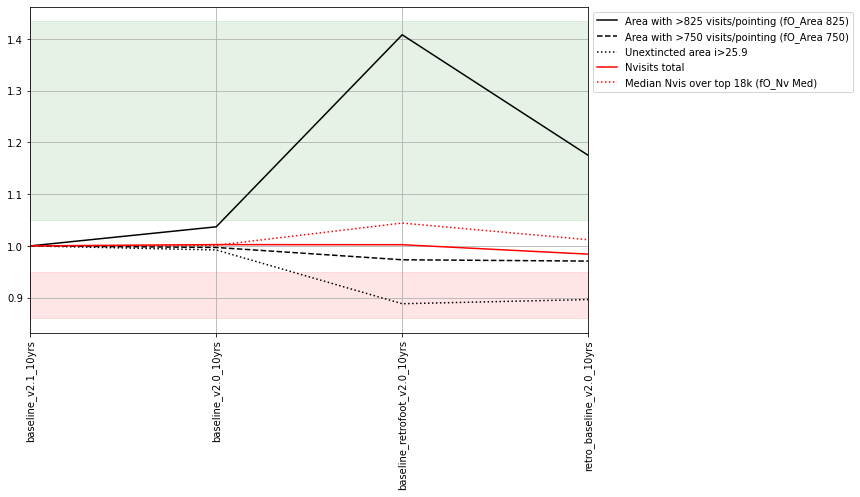

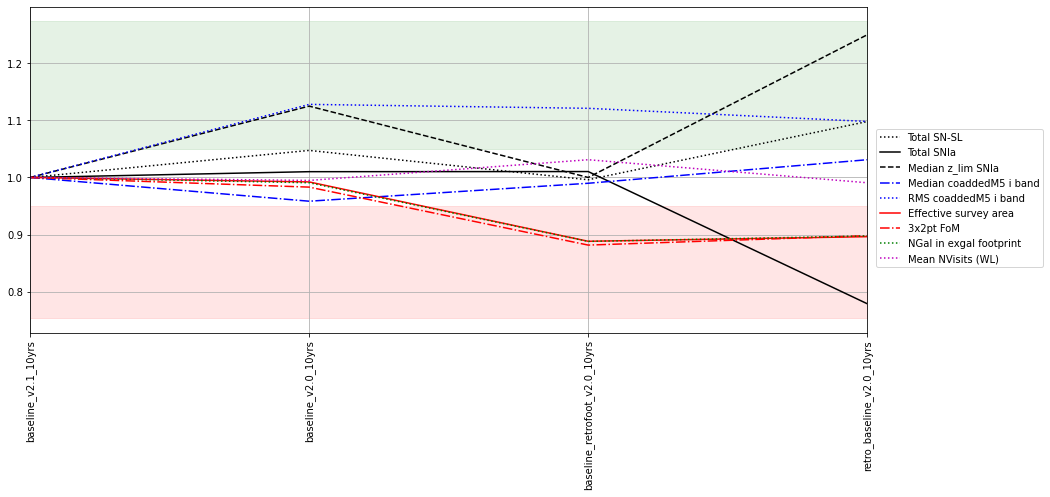

In [9]:
fam = 'baseline'
describe_family(fam)

---
**rolling** : The rolling family covers a wide variety of rolling cadence variations. These are arranged in general estimation of the impact of the rolling cadence, from "least" to "most" - no_roll has no rolling cadence at all, then variations on the number of stripes (ns=2/3/6) are added, as as which areas of the sky (WFD only, adding the bulge WFD-area, all-sky). The strength of rolling is also varied (rw=50,80 or 90%).  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
noroll_v2.0_10yrs,v2.0 baseline with no rolling,12558.35,17005.77,2083375.0,837.0,54.0,70.0,177.0,180.0,160.0,166.0
rolling_ns2_rw0.5_v2.0_10yrs,Rolling half-sky (2 regions) 50%,12614.58,16807.69,2084510.0,838.0,54.0,69.0,177.0,180.0,160.0,166.0
rolling_ns3_rw0.5_v2.0_10yrs,Rolling third-sky (3 regions) 50%,12729.57,16873.16,2085499.0,838.0,54.0,70.0,177.0,180.0,160.0,166.0
rolling_ns2_rw0.9_v2.0_10yrs,Rolling half-sky (2 regions) 90%,12893.23,16711.18,2086980.0,839.0,54.0,70.0,178.0,180.0,160.0,166.0
rolling_ns3_rw0.9_v2.0_10yrs,Rolling third-sky (3 regions) 90%,13255.80,16568.50,2090909.0,841.0,54.0,70.0,178.0,181.0,160.0,167.0
rolling_bulge_ns2_rw0.5_v2.0_10yrs,"Roll in the bulge with 2 regions, 50%",12600.32,16868.96,2084413.0,838.0,54.0,69.0,177.0,180.0,160.0,166.0
rolling_bulge_ns2_rw0.8_v2.0_10yrs,"Roll in the bulge with 2 regions, 80%",12733.76,16664.18,2086550.0,838.0,54.0,70.0,178.0,180.0,161.0,166.0
rolling_bulge_ns2_rw0.9_v2.0_10yrs,"Roll in the bulge with 2 regions, 90%",12940.23,16706.14,2087907.0,840.0,54.0,70.0,178.0,180.0,160.0,166.0
rolling_all_sky_ns2_rw0.9_v2.0_10yrs,Roll on all parts of the sky,12900.78,16599.55,2088105.0,839.0,54.0,69.0,178.0,180.0,160.0,166.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.200,7.748698
noroll_v2.0_10yrs,26.207366,0.115163,17005.767839,38.850004,4.653054e+09,185.268828,18471.025,0.225,8.318687
rolling_ns2_rw0.5_v2.0_10yrs,26.194565,0.112193,16807.694539,38.245354,4.596822e+09,185.367622,22731.041,0.225,8.135707
rolling_ns3_rw0.5_v2.0_10yrs,26.185661,0.113710,16873.159443,38.346230,4.613393e+09,185.586749,22987.168,0.225,7.910372
rolling_ns2_rw0.9_v2.0_10yrs,26.183049,0.111224,16711.175770,37.908126,4.568638e+09,185.960323,25374.969,0.225,8.116086
rolling_ns3_rw0.9_v2.0_10yrs,26.152484,0.107382,16568.495850,37.295010,4.525135e+09,186.437617,25465.387,0.225,7.538909
rolling_bulge_ns2_rw0.5_v2.0_10yrs,26.198819,0.113574,16868.962975,38.435104,4.614111e+09,185.372357,22350.489,0.225,8.085445
rolling_bulge_ns2_rw0.8_v2.0_10yrs,26.182385,0.112526,16664.175326,37.782096,4.555702e+09,185.273332,24889.510,0.225,8.107347
rolling_bulge_ns2_rw0.9_v2.0_10yrs,26.178392,0.111425,16706.140008,37.858618,NaN,185.701834,25370.897,0.225,8.130057


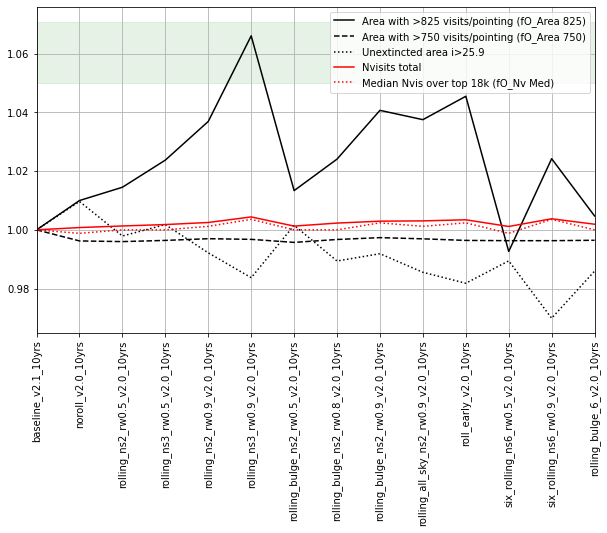

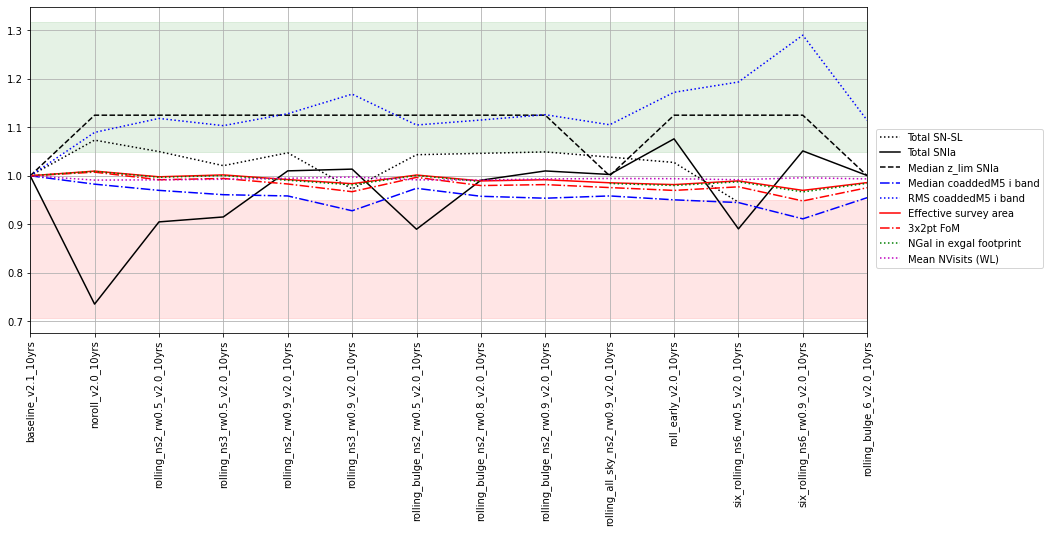

In [10]:
fam = 'rolling'
describe_family(fam)

---
**triplets** : These simulations add a third visit within each night, with variations on the time interval between the first pair of visits (standard separation of 33 minutes) to the third visit. The third visit is always acquired in the same filter as one of the earlier visits in the pair. The "presto_gap" runs take triplets all the time, at a set interval to the third visit and in the filter pairs described in the brief descriptions. The "presto_half" runs are similar, but only take triplets of visits about half of the time. The "long_gaps" runs vary the interval to the third visit, and generally have longer gaps of 2 to 7 hours. The long_gaps run take triplets at a variety of frequencies, ranging from every night to every few nights; in some simulations the triplets do not start until year 5.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
presto_gap1.5_v2.0_10yrs,"Triples spaced 1.5 hours apart g+r,r+i,i+z initial pairs",2177.97,12137.03,1991926.0,790.0,17.0,76.0,173.0,183.0,154.0,152.0
presto_gap2.0_v2.0_10yrs,"Triples spaced 2.0 hours apart g+r,r+i,i+z initial pairs",3255.62,11658.63,2004698.0,798.0,25.0,75.0,173.0,182.0,154.0,153.0
presto_gap2.5_v2.0_10yrs,"Triples spaced 2.5 hours apart g+r,r+i,i+z initial pairs",2386.95,12485.33,1986054.0,792.0,28.0,74.0,172.0,179.0,152.0,152.0
presto_gap3.0_v2.0_10yrs,"Triples spaced 3.0 hours apart g+r,r+i,i+z initial pairs",2732.74,12722.01,1986782.0,794.0,30.0,73.0,172.0,178.0,153.0,152.0
presto_gap3.5_v2.0_10yrs,"Triples spaced 3.5 hours apart g+r,r+i,i+z initial pairs",3034.05,12541.56,1992713.0,796.0,31.0,73.0,172.0,177.0,153.0,153.0
presto_gap4.0_v2.0_10yrs,"Triples spaced 4.0 hours apart g+r,r+i,i+z initial pairs",3530.07,12735.44,1998152.0,799.0,36.0,72.0,173.0,177.0,153.0,153.0
presto_gap1.5_mix_v2.0_10yrs,"Triples spaced 1.5 hours apart g+i,r+z,i+y initial pairs",1400.78,15687.24,1977886.0,787.0,19.0,71.0,171.0,176.0,159.0,159.0
presto_gap2.0_mix_v2.0_10yrs,"Triples spaced 2.0 hours apart g+i,r+z,i+y initial pairs",2426.40,15796.35,1995049.0,795.0,26.0,71.0,172.0,176.0,158.0,160.0
presto_gap2.5_mix_v2.0_10yrs,"Triples spaced 2.5 hours apart g+i,r+z,i+y initial pairs",1822.11,15860.13,1978530.0,790.0,30.0,70.0,170.0,173.0,156.0,158.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.2000,7.748698
presto_gap1.5_v2.0_10yrs,26.037901,0.074737,12137.025403,27.661797,3.297167e+09,191.367679,12810.540,0.2000,7.336917
presto_gap2.0_v2.0_10yrs,26.023217,0.075980,11658.628026,26.974929,3.165323e+09,190.408466,14444.230,0.2000,7.581226
presto_gap2.5_v2.0_10yrs,26.024171,0.076097,12485.332266,28.013503,3.390268e+09,186.873219,14684.601,0.2000,7.466808
presto_gap3.0_v2.0_10yrs,26.034161,0.076897,12722.013074,28.424409,3.455998e+09,186.347671,15856.882,0.2000,7.745066
presto_gap3.5_v2.0_10yrs,26.030520,0.074298,12541.564940,28.141455,3.405817e+09,184.932477,16064.351,0.2000,7.753800
presto_gap4.0_v2.0_10yrs,26.035858,0.077357,12735.441772,28.457556,3.459987e+09,184.172400,16191.031,0.2000,7.652688
presto_gap1.5_mix_v2.0_10yrs,26.158000,0.118014,15687.237523,35.152133,4.284019e+09,182.140763,13509.912,0.2000,7.713745
presto_gap2.0_mix_v2.0_10yrs,26.145654,0.109432,15796.345697,35.304796,4.311355e+09,182.426279,15276.444,0.2000,8.035571


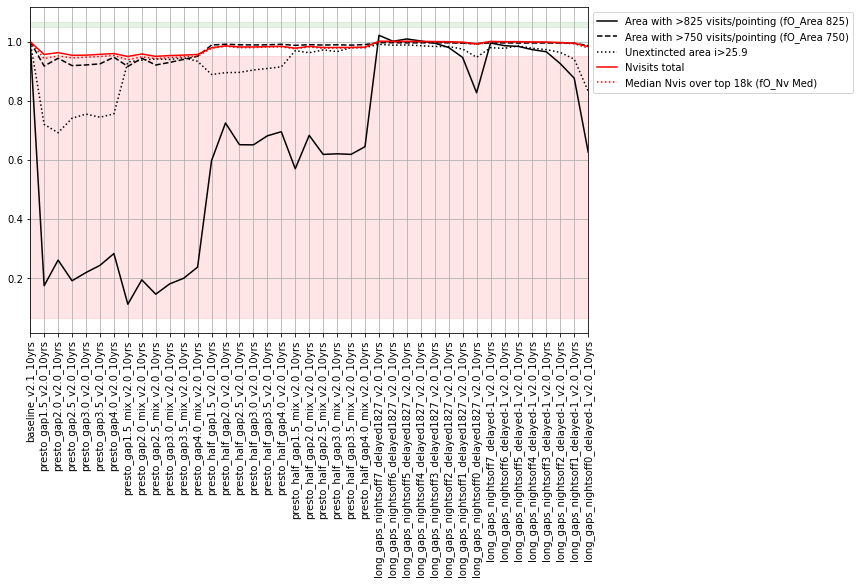

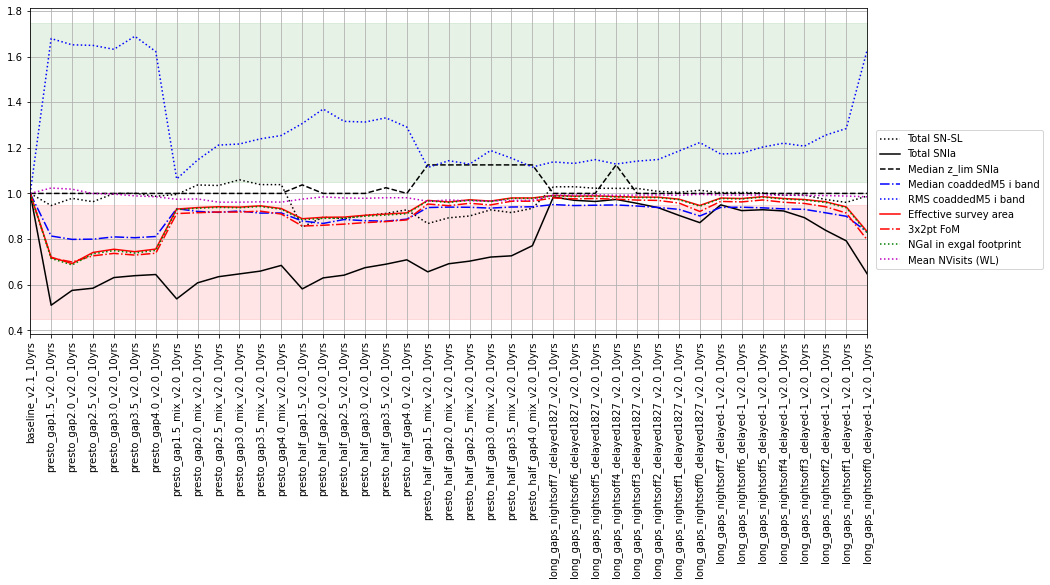

In [11]:
fam = 'triplets'
describe_family(fam)

---
**long gaps no pairs** : The baseline survey strategy takes pairs of visits every few nights, wherethe pair is separated by about 33 minutes. The pairs are taken in mixed filters, for color measurements. These simulations extend the gap between the pair of visits, modifying it to a variable time period of between 2 to 7 hours. The pair of visits are both in the same filter, in any of griz (g+r, r+i, or i+z pairs). In some of the simulations, these long gap visits are obtained throughout the survey, while for other simulations the longer time separations do not start until year 5.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs,Long gaps pairs every 7 nights starting after year 5,12520.58,16675.93,2084679.0,837.0,53.0,70.0,177.0,179.0,160.0,166.0
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs,Long gaps pairs every 6 nights starting after year 5,12443.37,16766.57,2083998.0,837.0,53.0,69.0,177.0,179.0,160.0,166.0
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs,Long gap pairs every 5 nights starting after year 5,12414.83,16655.78,2083679.0,837.0,53.0,70.0,177.0,179.0,160.0,166.0
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs,Long gap pairs every 4 nights starting after year 5,12335.94,16678.44,2082707.0,837.0,53.0,70.0,177.0,179.0,160.0,166.0
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs,Long gap pairs every 3 nights starting after year 5,12362.80,16618.85,2082329.0,837.0,53.0,70.0,177.0,179.0,160.0,165.0
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs,Long gap pairs every 2 nights starting after year 5,12073.24,16607.10,2080554.0,836.0,53.0,70.0,177.0,179.0,160.0,165.0
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs,Long gap pairs every other night starting after year 5,11339.70,16539.12,2075040.0,833.0,52.0,69.0,177.0,178.0,160.0,164.0
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs,Long gap pairs every night starting after year 5,9217.12,15952.45,2059335.0,825.0,48.0,70.0,176.0,176.0,159.0,160.0
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs,Long gaps pairs every 7 nights,12246.97,16623.89,2082384.0,837.0,53.0,69.0,177.0,179.0,160.0,166.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.200,7.748698
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs,26.178744,0.111050,16675.925437,37.783587,4.558478e+09,184.891691,24770.902,0.225,8.024803
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs,26.175381,0.109389,16766.569150,37.991001,4.582802e+09,184.979727,24165.616,0.225,7.982912
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs,26.178907,0.111028,16655.782389,37.733075,4.552931e+09,184.900025,23810.432,0.200,7.943845
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs,26.175679,0.110301,16678.443318,37.765834,4.559021e+09,184.601349,24000.174,0.225,7.944575
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs,26.174413,0.109303,16618.853469,37.602439,4.542264e+09,184.721984,23914.290,0.225,7.921582
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs,26.163836,0.109681,16607.103358,37.487186,4.537439e+09,184.241724,22826.345,0.200,7.831463
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs,26.156989,0.107804,16539.120573,37.256312,4.518008e+09,183.948341,21719.033,0.225,7.839254
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs,26.124324,0.099483,15952.454315,35.496480,4.351865e+09,183.160309,20386.695,0.200,8.269001


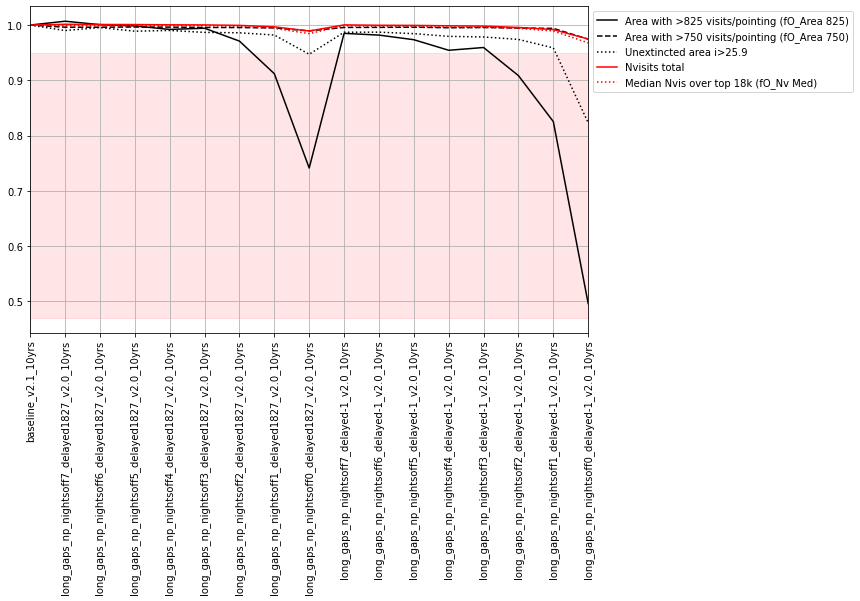

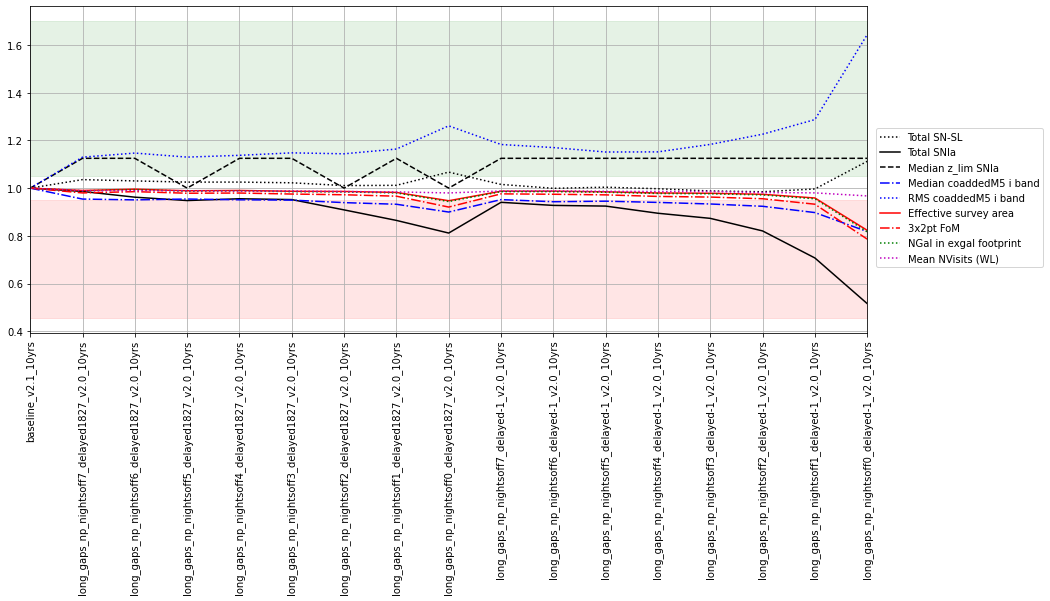

In [12]:
fam = 'long gaps no pairs'
describe_family(fam)

---
**suppress repeats** : This family of simulations adds a basis function to suppress repetition of visits to pointings on the sky which have already been observed in the same night. In the baseline, there are on the order of 20% of pointings which are observed 3 or more times per night (instead of only 2), so this basis function redistributes the "extra" 10% of visits into different nights, changing the inter-night cadence or season length.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
no_repeat_rpw-1.0_v2.1_10yrs,Baseline but suppress repeats of pointings within the night by rpw 1.0,12360.28,16983.95,2078336.0,837.0,NaN,NaN,NaN,NaN,NaN,NaN
no_repeat_rpw-2.0_v2.1_10yrs,Baseline but suppress repeats of pointings within the night by rpw 2.0,12258.72,17003.25,2077671.0,837.0,NaN,NaN,NaN,NaN,NaN,NaN
no_repeat_rpw-5.0_v2.1_10yrs,Baseline but suppress repeats of pointings within the night by rpw 5.0,12158.01,16900.86,2076775.0,836.0,54.0,NaN,NaN,NaN,NaN,NaN
no_repeat_rpw-10.0_v2.1_10yrs,Baseline but suppress repeats of pointings within the night by rpw 10.0,12262.08,16908.41,2077379.0,836.0,NaN,68.0,NaN,181.0,NaN,NaN
no_repeat_rpw-20.0_v2.1_10yrs,Baseline but suppress repeats of pointings within the night by rpw 20.0,11854.18,16956.25,2076942.0,835.0,NaN,NaN,NaN,NaN,NaN,NaN
no_repeat_rpw-100.0_v2.1_10yrs,Baseline but suppress repeats of pointings within the night by rpw 100.0,12038.83,16902.53,2077286.0,836.0,NaN,69.0,NaN,NaN,NaN,NaN


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.2,7.748698
no_repeat_rpw-1.0_v2.1_10yrs,26.226243,0.125965,16983.946204,38.930370,4.649554e+09,186.795760,26379.408,0.2,8.671250
no_repeat_rpw-2.0_v2.1_10yrs,26.222775,0.124203,17003.249958,38.954782,4.654634e+09,186.545881,27008.289,0.2,9.140247
no_repeat_rpw-5.0_v2.1_10yrs,26.230432,0.124739,16900.856134,38.749151,4.627546e+09,186.924716,27728.910,0.2,9.494008
no_repeat_rpw-10.0_v2.1_10yrs,26.223099,0.124145,16908.409776,38.715392,4.628588e+09,186.774496,27439.326,0.2,9.716295
no_repeat_rpw-20.0_v2.1_10yrs,26.214930,0.125241,16956.249514,38.778164,4.640728e+09,186.789041,27243.310,0.2,9.823104
no_repeat_rpw-100.0_v2.1_10yrs,26.219869,0.127615,16902.534721,38.676938,4.626604e+09,187.077462,27090.720,0.2,9.809941


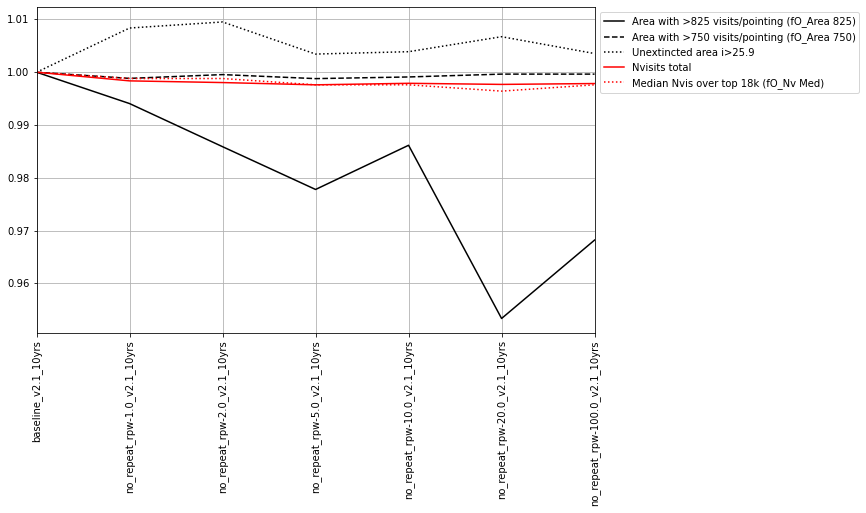

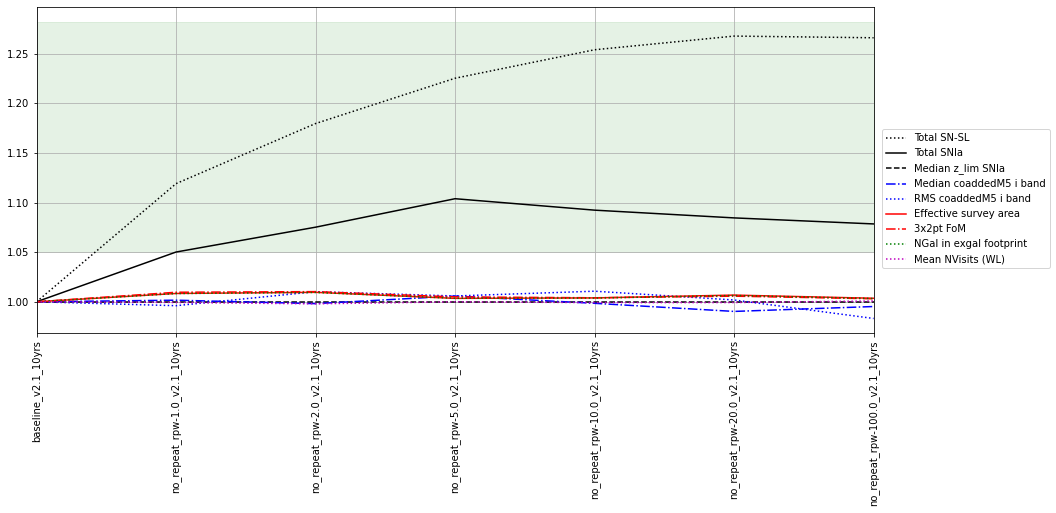

In [13]:
fam = 'suppress repeats'
describe_family(fam)

---
**bluer balance** : The standard filter balance in the dust-free WFD in the baseline is {'u': 0.07, 'g': 0.09, 'r': 0.22, 'i': 0.22, 'z': 0.20, 'y': 0.20}. These simulations vary the filter balance, skewing it bluer. One simulation adds visits to g band,while the other adds visits to both u and g band, in each case by taking some visits from rizy.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
bluer_indx0_v2.0_10yrs,"More g - filter ratio in WFD of {'u': 0.07, 'g': 0.12, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.20}",12849.59,16155.56,2088051.0,839.0,53.0,94.0,170.0,171.0,152.0,166.0
bluer_indx1_v2.0_10yrs,"More u and g - filter ratio in WFD of {'u': 0.08, 'g': 0.11, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.20}",12876.44,16210.12,2089107.0,839.0,61.0,86.0,170.0,171.0,152.0,167.0


---
**longer u visits** : The baseline survey uses 2x15s visits for all bands except u band. In the baseline, u band visits are 1x30s to reduce the effects of readnoise (which are most extreme in u, due to the low sky-background). These simulations extend the u band visit time further, to 1x50s. In one simulation, the total amount of survey time spent on u band is kept the same, so the number of visits is reduced accordingly. In the other simulation, more survey time is spent in u band in order to maintain the number of visits in u.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
long_u1_v2.0_10yrs,"u band visits 1x50s, number of u visits same as baseline",17197.97,16420.78,2021286.0,866.0,52.0,67.0,171.0,174.0,155.0,161.0
long_u2_v2.0_10yrs,"u band visits 1x50s, fewer number of u visits",15840.83,16687.68,2040731.0,854.0,33.0,70.0,177.0,181.0,160.0,167.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.200,7.748698
bluer_indx0_v2.0_10yrs,26.146639,0.105722,16155.563377,36.195295,4.410278e+09,176.917087,25333.849,0.200,7.898603
bluer_indx1_v2.0_10yrs,26.149411,0.104912,16210.117464,36.355753,4.426129e+09,176.981361,24976.627,0.225,7.956437
long_u1_v2.0_10yrs,26.165333,0.105054,16420.780169,37.022090,4.485891e+09,180.028214,23383.266,0.225,8.005726
long_u2_v2.0_10yrs,26.190223,0.109476,16687.675548,37.903751,4.563243e+09,186.766786,25226.758,0.200,7.975755


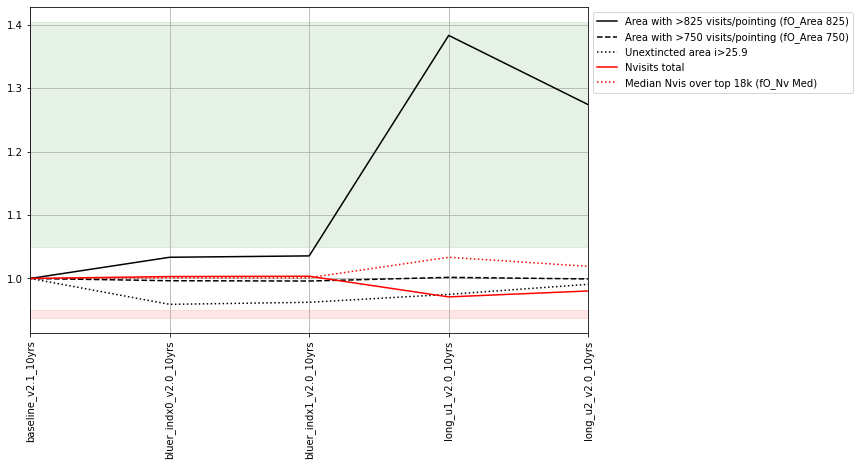

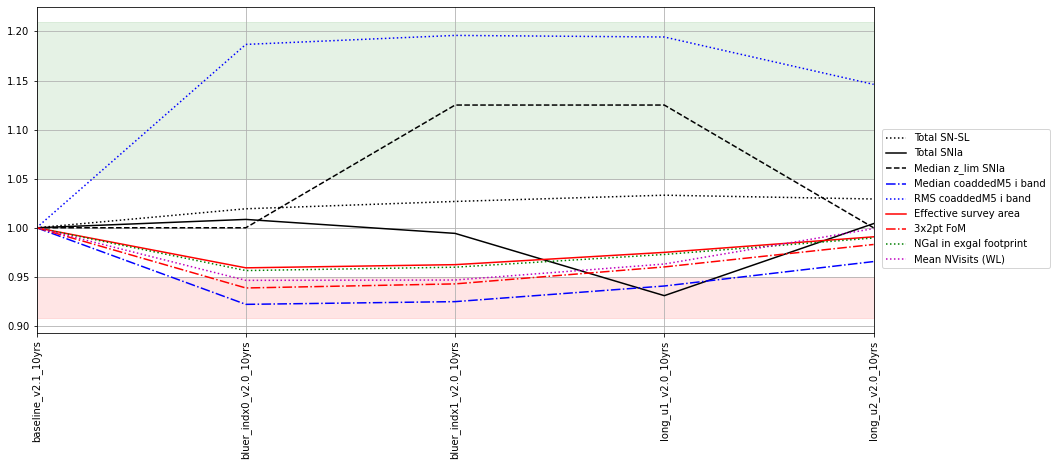

In [14]:
fam = ['bluer balance',  'longer u visits']
describe_family(fam)

---
**vary gp** : These simulations investigate the effect of varying the amount of survey time spent on covering the background (non-WFD-level) Galactic Plane area. The baseline characteristics, including the ratio of visits over the remainder of the footprint, are kept the same.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
vary_gp_gpfrac0.01_v2.0_10yrs,Dusty plane at 1% WFD level,16736.35,16818.61,2088147.0,861.0,55.0,71.0,182.0,185.0,165.0,171.0
vary_gp_gpfrac0.05_v2.0_10yrs,Dusty plane at 5% WFD level,16665.01,16706.14,2088534.0,861.0,55.0,71.0,182.0,185.0,164.0,171.0
vary_gp_gpfrac0.10_v2.0_10yrs,Dusty plane at 10% WFD level,16511.42,16810.21,2088477.0,859.0,55.0,71.0,182.0,185.0,164.0,170.0
vary_gp_gpfrac0.15_v2.0_10yrs,Dusty plane at 15% WFD level,15621.77,16739.71,2088838.0,853.0,54.0,71.0,181.0,183.0,163.0,169.0
vary_gp_gpfrac0.20_v2.0_10yrs,Dusty plane at 20% WFD level,14733.80,16736.35,2088077.0,847.0,54.0,70.0,179.0,182.0,162.0,168.0
vary_gp_gpfrac0.25_v2.0_10yrs,Dusty plane at 25% WFD level,13427.02,16636.48,2088389.0,841.0,54.0,70.0,178.0,181.0,161.0,167.0
vary_gp_gpfrac0.30_v2.0_10yrs,Dusty plane at 30% WFD level,11804.67,16665.01,2087314.0,834.0,54.0,69.0,176.0,179.0,160.0,166.0
vary_gp_gpfrac0.35_v2.0_10yrs,Dusty plane at 35% WFD level,9751.75,16700.26,2086873.0,827.0,53.0,69.0,174.0,177.0,158.0,165.0
vary_gp_gpfrac0.40_v2.0_10yrs,Dusty plane at 40% WFD level,7674.50,16560.94,2086160.0,820.0,53.0,70.0,173.0,176.0,156.0,163.0


---
**galactic plane footprint** : These simulations use the galactic plane priority map, contributed by LSST SMLV & TVS science collaborations, as the basis for further variations on galactic plane coverage. Instead of a "bulge area" as in the baseline and vary gp family, different levels of priority of the galactic plane map are covered at WFD levels. In addition, pencil beam fields are added or not, in various simulations.   
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
plane_priority_priority1.2_pbf_v2.1_10yrs,"Select galactic plane priority map above 1.2 threshold value, without pencilbeams",6545.65,16936.11,2019424.0,815.0,53.0,67.0,174.0,176.0,155.0,160.0
plane_priority_priority0.9_pbf_v2.1_10yrs,"Select galactic plane priority map above 0.9 threshold value, without pencilbeams",5655.16,16839.59,2019086.0,811.0,53.0,67.0,174.0,176.0,154.0,159.0
plane_priority_priority0.6_pbf_v2.1_10yrs,"Select galactic plane priority map above 0.6 threshold value, without pencilbeams",2586.70,16633.96,2018906.0,795.0,51.0,65.0,171.0,172.0,152.0,155.0
plane_priority_priority0.4_pbf_v2.1_10yrs,"Select galactic plane priority map above 0.4 threshold value, without pencilbeams",604.29,16384.69,2019352.0,748.0,46.0,62.0,162.0,163.0,144.0,145.0
plane_priority_priority0.3_pbf_v2.1_10yrs,"Select galactic plane priority map above 0.3 threshold value, without pencilbeams",156.11,16008.69,2019186.0,727.0,45.0,61.0,157.0,159.0,141.0,139.0
plane_priority_priority0.2_pbf_v2.1_10yrs,"Select galactic plane priority map above 0.2 threshold value, without pencilbeams",367.61,15344.81,2018674.0,693.0,42.0,61.0,150.0,151.0,135.0,129.0
plane_priority_priority0.1_pbf_v2.1_10yrs,"Select galactic plane priority map above 0.1 threshold value, without pencilbeams",119.18,13434.57,2013032.0,646.0,37.0,89.0,140.0,140.0,127.0,51.0
plane_priority_priority1.2_pbt_v2.1_10yrs,"Select galactic plane priority map above 1.2 threshold value, with map pencilbeam fields",6545.65,16936.11,2019424.0,815.0,53.0,67.0,174.0,176.0,155.0,160.0
plane_priority_priority0.9_pbt_v2.1_10yrs,"Select galactic plane priority map above 0.9 threshold value, with map pencilbeam fields",4391.18,16814.41,2019098.0,806.0,52.0,66.0,173.0,174.0,154.0,158.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.200,7.748698
vary_gp_gpfrac0.01_v2.0_10yrs,26.193514,0.112069,16818.605356,38.265413,4.599381e+09,190.771895,26555.971,0.225,8.281814
vary_gp_gpfrac0.05_v2.0_10yrs,26.194081,0.113707,16706.140008,37.980987,4.569087e+09,190.627179,26171.069,0.225,8.286850
vary_gp_gpfrac0.10_v2.0_10yrs,26.194424,0.113406,16810.212420,38.250756,4.596944e+09,190.266164,26637.717,0.200,8.266807
vary_gp_gpfrac0.15_v2.0_10yrs,26.186410,0.109915,16739.711754,38.007750,4.577185e+09,189.001354,25934.908,0.200,8.177405
vary_gp_gpfrac0.20_v2.0_10yrs,26.186397,0.110098,16736.354579,37.999013,4.575832e+09,187.722531,25730.330,0.225,8.110533
vary_gp_gpfrac0.25_v2.0_10yrs,26.174918,0.112216,16636.478635,37.651776,4.546934e+09,186.191958,25330.026,0.200,8.032803
vary_gp_gpfrac0.30_v2.0_10yrs,26.174795,0.110335,16665.014619,37.724236,4.554724e+09,184.774527,25169.822,0.225,7.945946
vary_gp_gpfrac0.35_v2.0_10yrs,26.169414,0.110386,16700.264952,37.772424,4.563952e+09,182.932858,24412.690,0.200,7.834257


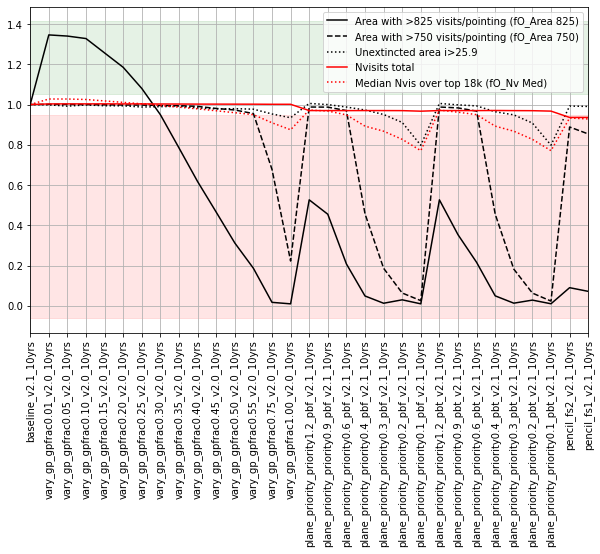

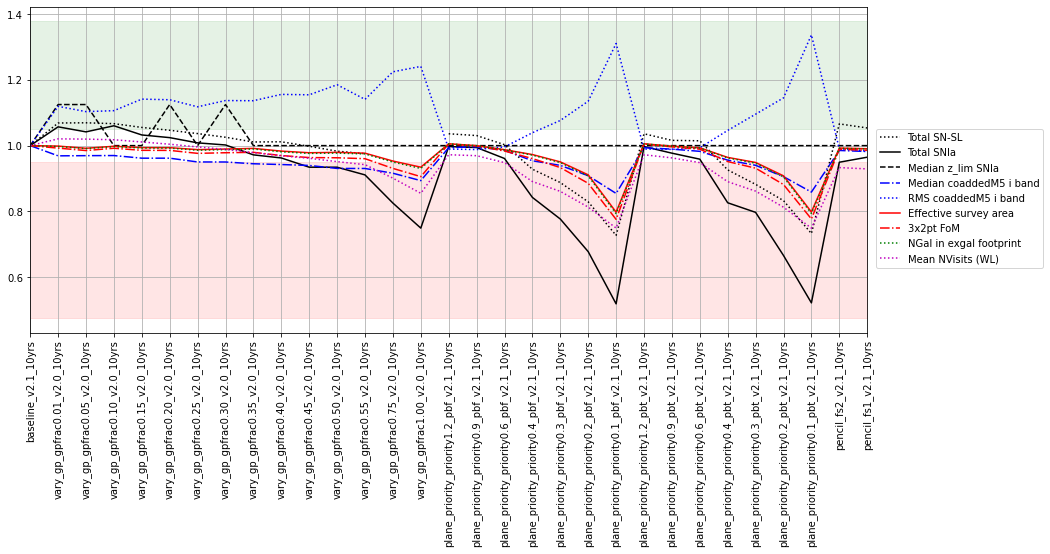

In [15]:
fam = ['vary gp', 'galactic plane footprint']
describe_family(fam)

---
**vary nes** : These simulations investigate the effect of varying the amount of survey time spent on covering the North Ecliptic Spur area. The baseline characteristics, including the ratio of visits over the remainder of the footprint, are kept the same.   
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
vary_nes_nesfrac0.01_v2.0_10yrs,NES at 1% WFD level,17534.52,16896.66,2087392.0,869.0,55.0,72.0,184.0,187.0,167.0,172.0
vary_nes_nesfrac0.05_v2.0_10yrs,NES at 5% WFD level,17223.14,16868.96,2087572.0,865.0,55.0,71.0,183.0,186.0,166.0,172.0
vary_nes_nesfrac0.10_v2.0_10yrs,NES at 10% WFD level,16779.16,16769.09,2087761.0,861.0,55.0,71.0,182.0,185.0,165.0,171.0
vary_nes_nesfrac0.15_v2.0_10yrs,NES at 15% WFD level,16146.33,16760.69,2087741.0,856.0,55.0,71.0,181.0,184.0,164.0,170.0
vary_nes_nesfrac0.20_v2.0_10yrs,NES at 20% WFD level,15380.06,16815.25,2087462.0,851.0,55.0,71.0,180.0,183.0,163.0,169.0
vary_nes_nesfrac0.25_v2.0_10yrs,NES at 25% WFD level,14228.55,16691.03,2087377.0,845.0,54.0,70.0,179.0,181.0,161.0,168.0
vary_nes_nesfrac0.30_v2.0_10yrs,NES at 30% WFD level,12893.23,16711.18,2086980.0,839.0,54.0,70.0,178.0,180.0,160.0,166.0
vary_nes_nesfrac0.35_v2.0_10yrs,NES at 35% WFD level,11059.37,16583.60,2087488.0,832.0,53.0,69.0,176.0,178.0,159.0,165.0
vary_nes_nesfrac0.40_v2.0_10yrs,NES at 40% WFD level,9061.01,16561.78,2087857.0,825.0,53.0,69.0,174.0,177.0,157.0,164.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.200,7.748698
vary_nes_nesfrac0.01_v2.0_10yrs,26.197349,0.114105,16896.659665,38.495324,4.621887e+09,192.490016,27458.520,0.225,8.355821
vary_nes_nesfrac0.05_v2.0_10yrs,26.195156,0.110713,16868.962975,38.407499,4.613605e+09,191.675108,26907.677,0.225,8.210073
vary_nes_nesfrac0.10_v2.0_10yrs,26.193052,0.114435,16769.087031,38.134552,4.585918e+09,190.714364,26880.965,0.225,8.228614
vary_nes_nesfrac0.15_v2.0_10yrs,26.187207,0.109778,16760.694095,38.067924,4.583771e+09,189.168152,25730.967,0.225,8.143884
vary_nes_nesfrac0.20_v2.0_10yrs,26.183959,0.111453,16815.248182,38.183515,4.597263e+09,188.293436,26452.062,0.225,8.235310
vary_nes_nesfrac0.25_v2.0_10yrs,26.180097,0.111551,16691.032722,37.833131,4.563107e+09,187.031528,25718.026,0.225,8.061234
vary_nes_nesfrac0.30_v2.0_10yrs,26.183049,0.111224,16711.175770,37.908126,4.568638e+09,185.960323,25374.969,0.225,8.116086
vary_nes_nesfrac0.35_v2.0_10yrs,26.170806,0.111146,16583.603136,37.482975,4.532286e+09,184.033807,25279.688,0.225,7.885586


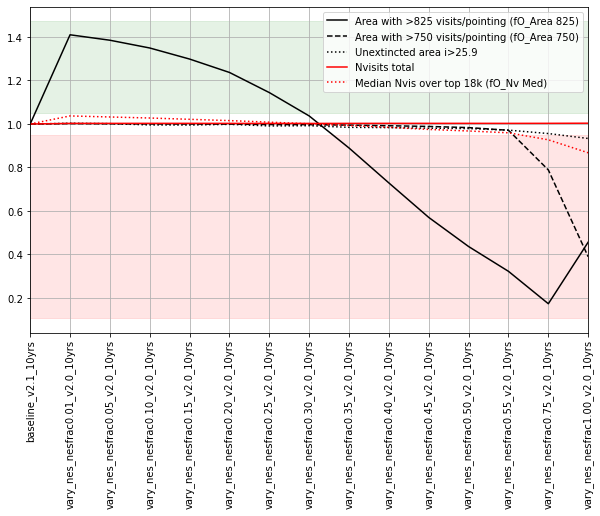

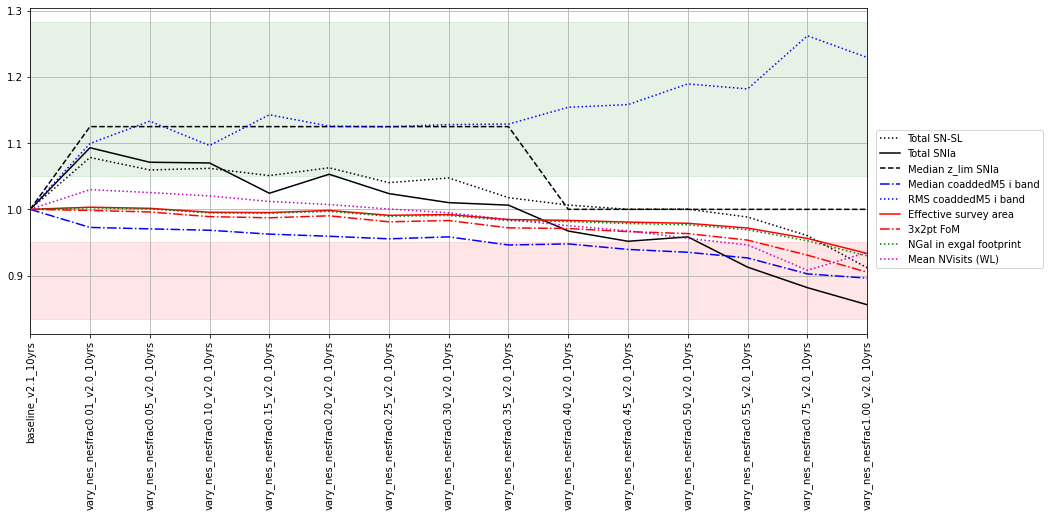

In [16]:
fam = ['vary nes']
describe_family(fam)

---
**vary expt** : The baseline survey strategy uses 2x15s visits for grizy filters, and 1x30s visits for u band. The simulations in this family vary the exposure time per visit from 20 to 40 seconds, to evaluate the impact on various metrics of varying individual image depth (the "shave_" runs). In addition, there is one simulation (`vary_expt_v2.0_10yrs`) which uses variable exposure time per visit to attempt to make the individual image depth consistent - each visit in this simulation could have an exposure time of between 20 to 100 seconds.  
**version**: --  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
shave_20_v2.1_10yrs,Reduce exposure time per visit to 20 seconds,19186.25,15422.02,2791414.0,1125.0,73.0,93.0,242.0,244.0,215.0,222.0
shave_22_v2.1_10yrs,Reduce exposure time per visit to 22 seconds,19074.63,15961.69,2611966.0,1053.0,68.0,87.0,226.0,228.0,200.0,208.0
shave_25_v2.1_10yrs,Reduce exposure time per visit to 25 seconds,18796.82,16501.35,2383592.0,961.0,62.0,79.0,206.0,208.0,183.0,189.0
shave_28_v2.1_10yrs,Reduce exposure time per visit to 29 seconds,18151.40,16810.21,2192248.0,884.0,57.0,72.0,189.0,191.0,168.0,174.0
shave_30_v2.1_10yrs,Keep exposure time per visit at 30 seconds,12524.78,17008.29,2081086.0,838.0,55.0,69.0,179.0,181.0,159.0,165.0
shave_32_v2.1_10yrs,Extend exposure time per visit to 32 seconds,2982.85,17111.52,1980338.0,797.0,51.0,65.0,170.0,172.0,151.0,157.0
shave_35_v2.1_10yrs,Extend exposure time per visit to 35 seconds,143.52,17180.34,1847269.0,744.0,48.0,61.0,158.0,161.0,141.0,147.0
shave_38_v2.1_10yrs,Extend exposure time per visit to 38 seconds,109.11,17224.82,1729706.0,696.0,45.0,57.0,148.0,150.0,131.0,138.0
shave_40_v2.1_10yrs,Extend exposure time per visit to 40 seconds,108.27,17265.95,1660675.0,667.0,43.0,55.0,142.0,144.0,126.0,131.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.200,7.748698
shave_20_v2.1_10yrs,26.125088,0.105276,15422.020731,34.240271,4.206577e+09,250.753633,6688.436,0.100,8.390000
shave_22_v2.1_10yrs,26.150962,0.109248,15961.686545,35.752577,4.357916e+09,235.022032,7657.520,0.100,8.297883
shave_25_v2.1_10yrs,26.181066,0.115357,16501.352358,37.355180,4.510520e+09,214.468491,9438.657,0.150,8.344714
shave_28_v2.1_10yrs,26.212364,0.120782,16810.212420,38.386018,4.599839e+09,197.326527,10544.335,0.150,8.050823
shave_30_v2.1_10yrs,26.229043,0.127920,17008.285720,39.012207,4.656984e+09,187.044017,24838.179,0.205,7.803867
shave_32_v2.1_10yrs,26.241961,0.125725,17111.518839,39.363850,4.687389e+09,177.815136,25498.858,0.250,7.546428
shave_35_v2.1_10yrs,26.260815,0.131711,17180.340917,39.663268,4.708848e+09,165.799365,24690.663,0.250,7.207590
shave_38_v2.1_10yrs,26.276295,0.137737,17224.823481,39.874086,4.723098e+09,155.065926,23737.613,0.250,6.740664


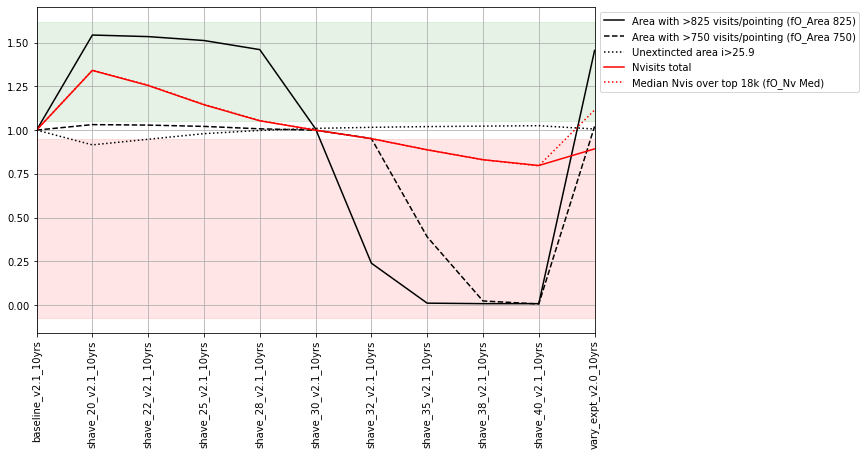

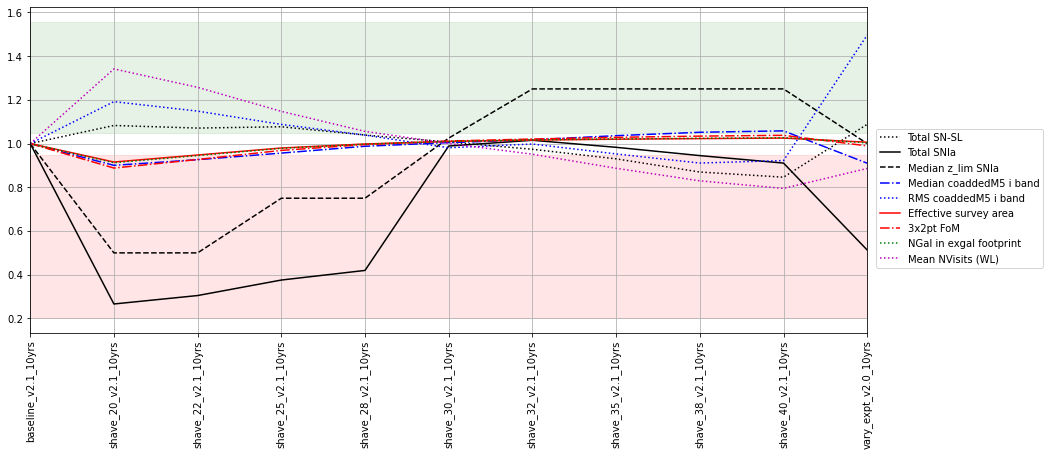

In [17]:
fam = ['vary expt']
describe_family(fam)

---
**good seeing** : This family of simulations adds a requirement for 3 "good seeing" (seeing < 0.8 arcseconds) images per year, in various bandpasses. Note that `baseline_v2.1_10yrs` (and other v2.1 simulations) adds this requirement in r and i bands as the default.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
good_seeing_gsw0.0_v2.1_10yrs,"Good seeing priority, with weight 0.0, grizy only",12814.34,16662.50,2083703.0,840.0,54.0,69.0,179.0,181.0,160.0,166.0
good_seeing_gsw1.0_v2.1_10yrs,"Good seeing priority, with weight 1.0, grizy only",12507.15,16831.19,2082749.0,839.0,54.0,69.0,179.0,181.0,160.0,166.0
good_seeing_gsw3.0_v2.1_10yrs,"Good seeing priority, with weight 3.0, grizy only",12434.14,16842.94,2081749.0,838.0,54.0,68.0,179.0,181.0,159.0,165.0
good_seeing_gsw6.0_v2.1_10yrs,"Good seeing priority, with weight 6.0, grizy only",12217.60,16857.21,2079596.0,837.0,54.0,69.0,179.0,182.0,158.0,165.0
good_seeing_gsw10.0_v2.1_10yrs,"Good seeing priority, with weight 10.0, grizy only",12151.29,16915.96,2078628.0,837.0,54.0,69.0,179.0,182.0,158.0,165.0
good_seeing_gsw20.0_v2.1_10yrs,"Good seeing priority, with weight 20.0, grizy only",11874.33,16857.21,2077820.0,836.0,53.0,68.0,179.0,182.0,158.0,165.0
good_seeing_gsw50.0_v2.1_10yrs,"Good seeing priority, with weight 50.0, grizy only",11885.24,16866.45,2077887.0,836.0,53.0,68.0,179.0,181.0,158.0,164.0
good_seeing_u_gsw0.0_v2.1_10yrs,"Good seeing priority, with weight 0.0, including ugri band",13287.70,16677.60,2087748.0,841.0,55.0,68.0,179.0,182.0,160.0,167.0
good_seeing_u_gsw50.0_v2.1_10yrs,"Good seeing priority, with weight 50.0, including ugri band",12481.14,16837.07,2083015.0,837.0,54.0,69.0,179.0,182.0,159.0,165.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.2000,7.748698
good_seeing_gsw0.0_v2.1_10yrs,26.178592,0.107596,16662.496738,37.747845,4.554577e+09,186.743263,24829.912,0.2175,7.643773
good_seeing_gsw1.0_v2.1_10yrs,26.201303,0.121316,16831.194761,38.356787,4.604379e+09,186.791663,25119.320,0.2250,7.603369
good_seeing_gsw3.0_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.2000,7.748698
good_seeing_gsw6.0_v2.1_10yrs,26.240366,0.129091,16857.212864,38.709880,4.617206e+09,187.217974,25351.488,0.2250,7.929691
good_seeing_gsw10.0_v2.1_10yrs,26.241477,0.135413,16915.963419,38.866184,4.633425e+09,187.060283,24698.935,0.2250,7.970103
good_seeing_gsw20.0_v2.1_10yrs,26.244344,0.135539,16857.212864,38.738235,4.617610e+09,187.418969,24704.156,0.2250,7.948122
good_seeing_gsw50.0_v2.1_10yrs,26.244334,0.136402,16866.445094,38.761442,4.620395e+09,187.029409,24930.025,0.2000,7.947448
good_seeing_u_gsw0.0_v2.1_10yrs,26.186160,0.113392,16677.604024,37.846207,4.559761e+09,187.358965,25535.802,0.2150,8.085707


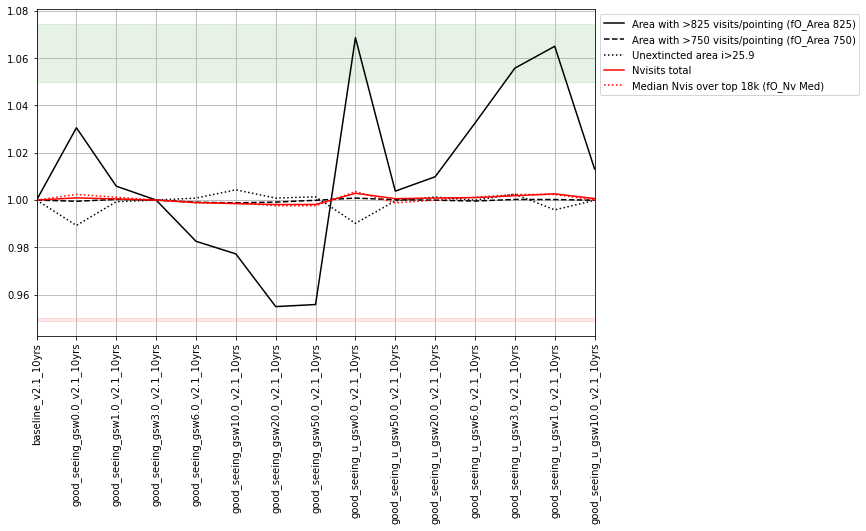

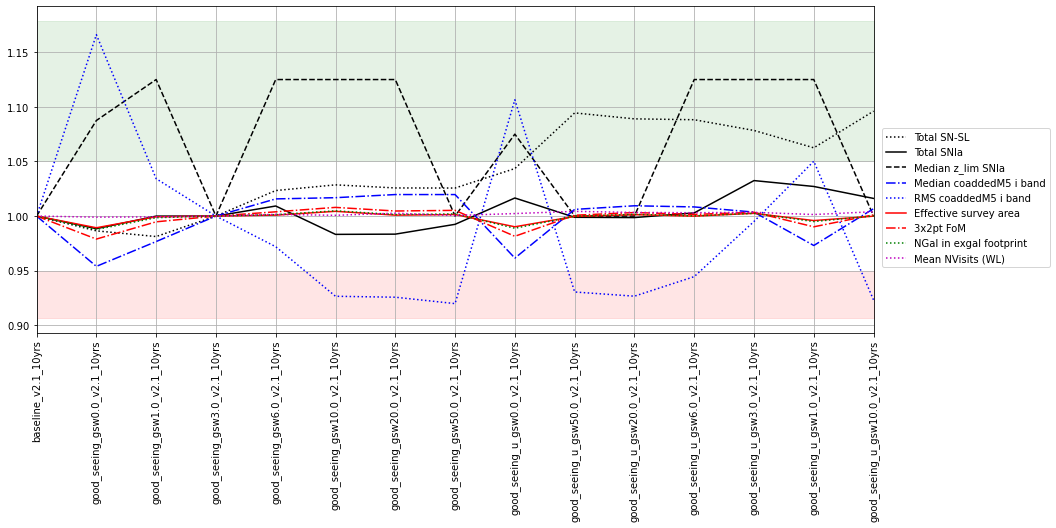

In [18]:
fam = ['good seeing']
describe_family(fam)

---
**microsurveys** : There are special programs which can achieve additional science beyond or supporting the primary Rubin LSST science drivers, if provided specialized observing time via "microsurveys". These simulations investigate a subset of microsurvey proposals, described further in their brief descriptions.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
virgo_cluster_v2.0_10yrs,Add the virgo cluster to WFD footprint,12161.36,16686.00,2087802.0,836.0,54.0,70.0,177.0,179.0,160.0,165.0
carina_v2.0_10yrs,One week per year observing Carina,12519.74,16385.53,2087222.0,838.0,54.0,70.0,178.0,178.0,160.0,166.0
smc_movie_v2.0_10yrs,Two nights of observing the SMC in movie mode,12732.08,16743.07,2089048.0,838.0,54.0,69.0,177.0,180.0,160.0,167.0
roman_v2.0_10yrs,Microsurvey of the Roman bulge field,12283.06,16671.73,2083719.0,837.0,54.0,69.0,177.0,180.0,160.0,166.0
local_gal_bindx0_v2.0_10yrs,"Increase local galaxy coverage {'g': 0.5, 'r': 0.2, 'i': 0.1}",12330.90,16550.87,2087499.0,837.0,53.0,70.0,177.0,179.0,159.0,165.0
local_gal_bindx1_v2.0_10yrs,"Increasing local galaxy coverage {'g': 1.0, 'r': 0.3, 'i': 0.1}",11938.11,16554.23,2087949.0,836.0,52.0,72.0,177.0,178.0,159.0,164.0
local_gal_bindx2_v2.0_10yrs,"Increasing local galaxy coverage {'g': 1.5, 'r': 0.35, 'i': 0.2}",11226.39,16456.87,2087603.0,833.0,51.0,72.0,176.0,176.0,157.0,163.0
too_rate10_v2.0_10yrs,"Follow up ToO alerts, 10 events per year",12710.26,16508.91,2086250.0,838.0,54.0,70.0,177.0,180.0,160.0,166.0
too_rate50_v2.0_10yrs,"Follow up ToO alerts, 50 events per year",11628.41,16609.62,2079989.0,834.0,53.0,69.0,177.0,179.0,159.0,164.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.200,7.748698
virgo_cluster_v2.0_10yrs,26.179898,0.109142,16685.996960,37.818604,4.561217e+09,184.895629,24726.586,0.200,8.104666
carina_v2.0_10yrs,26.159741,0.108413,16385.529835,36.886157,4.475945e+09,184.004866,25594.465,0.225,9.315304
smc_movie_v2.0_10yrs,26.176621,0.110447,16743.068928,37.939982,4.576140e+09,185.370595,25205.719,0.225,8.024434
roman_v2.0_10yrs,26.178905,0.110391,16671.728968,37.774065,4.557612e+09,185.265556,25564.706,0.225,8.036221
local_gal_bindx0_v2.0_10yrs,26.172542,0.111153,16550.870684,37.413020,4.523588e+09,185.006744,25127.518,0.225,7.968204
local_gal_bindx1_v2.0_10yrs,26.157228,0.109003,16554.227858,37.297158,4.521967e+09,183.706905,25066.633,0.200,8.008921
local_gal_bindx2_v2.0_10yrs,26.149121,0.105720,16456.869795,36.979896,4.494182e+09,182.039219,24421.186,0.200,8.037068
too_rate10_v2.0_10yrs,26.180281,0.112366,16508.906001,37.368115,4.513034e+09,185.615201,24773.660,0.200,8.045348


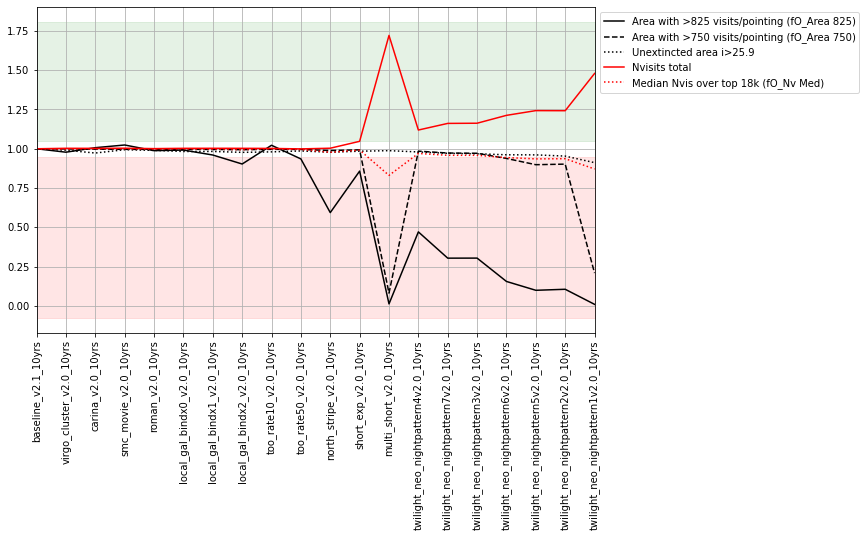

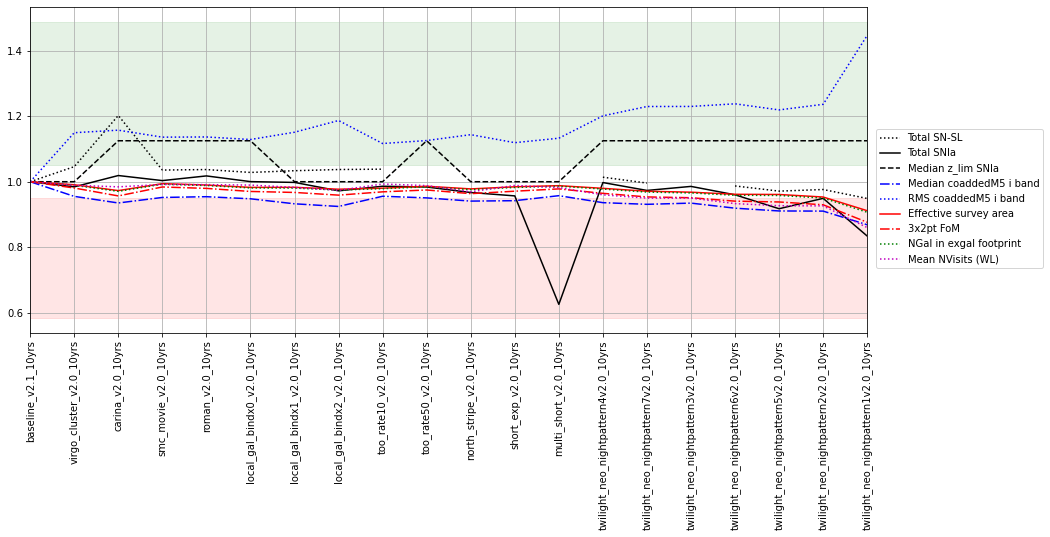

In [24]:
fam = ['microsurveys']
describe_family(fam)

---
**technical** : This family is primarily aimed at questions arising in the course of the project team work, but one simulation seemed interesting to make available to the community. This is the `march_start_v2.1_10yrs` run, which simulates a March 2023 start to the survey. This is impractical, but could serve as a useful off-season comparison to the baseline, which starts in October 2024.   
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
march_start_v2.1_10yrs,Start the survey in March 2022,11791.24,16935.27,2076012.0,835.0,54.0,68.0,178.0,181.0,159.0,165.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.200,7.748698
march_start_v2.1_10yrs,26.231497,0.129173,16935.267173,38.844137,4.637894e+09,186.565269,25646.530,0.225,7.920824


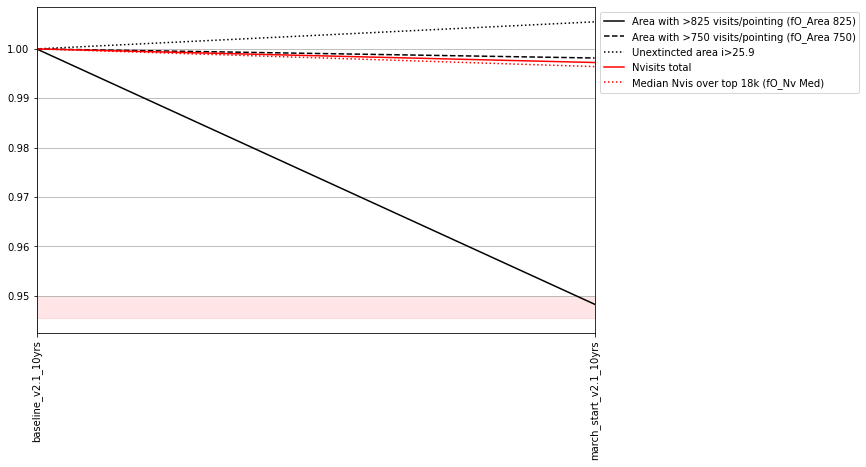

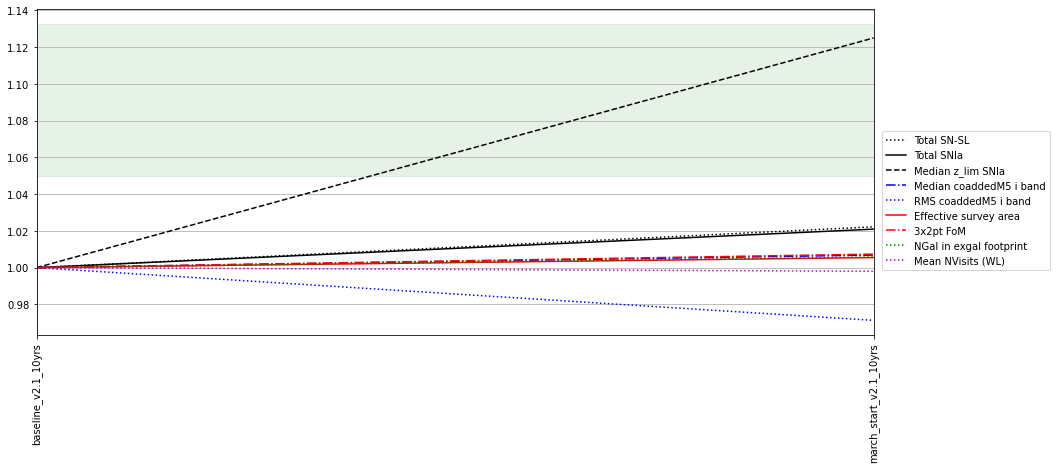

In [19]:
fam = ['technical']
describe_family(fam)

---
**ddf percent** : The baseline survey strategy adds five Deep Drilling Fields, each allocated about 1% of the total survey observing time, for about 5% total. In these simulations, the amount of time allocated for DDFs is varied from 3 to 8%. It is worth noting that we anticipate implementing improvements on the DDF scheduling algorithm in the next six months, and will revisit more complicated DDF scheduling requests with that improvement in hand.This family uses "original" DDF scheduling, not the v2.1 pre-scheduled optimized visits.  
**version**: 2.0  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_frac_ddf_per0.6_v2.0_10yrs,DDF fraction of visits reduced to 3% of total,15656.18,16786.71,2087949.0,853.0,55.0,71.0,180.0,183.0,163.0,169.0
ddf_frac_ddf_per1.6_v2.0_10yrs,DDF fraction of visits increased to 8%,5702.16,16396.44,2086426.0,811.0,52.0,67.0,171.0,174.0,155.0,161.0


---
**ddf euclid moved** : This simulation moves the fifth DDF from Euclid South to an otherwise optimally (for non-competition between DDF locations purposes) located field. The purpose is to show that choosing Euclid South for the fifth DDF has little to no impact on the rest of the survey outside the DDF fields. This was demonstrated to the SCOC in slides located available at  https://docs.google.com/presentation/d/1TSKXsEX2Q3aY60dDVpc6Q9K2irxEyxQhVQBqLMetvag/edit#slide=id.p  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_euclid_moved_slf0.20_v2.1_10yrs,"Move Euclid South DDF to single new ""easy-scheduling"" position",11412.71,16802.66,2092831.0,834.0,54.0,68.0,178.0,181.0,157.0,165.0


---
**ddf season length** : This family investigates the effect of varying the season length within the DDF fields. `season length fraction` reflects how much of the available season is used -- 0.1 indicates that 10% of the available season is removed at each end (for a total of 80% of the available season used for observations), while 0.3 would indicate that 40% of the total possible season is used. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_season_length_slf0.10_v2.1_10yrs,DDF with season length fraction 0.10,11914.61,16855.53,2093356.0,836.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_season_length_slf0.15_v2.1_10yrs,DDF with season length fraction 0.15,11201.21,16874.00,2092507.0,833.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_season_length_slf0.20_v2.1_10yrs,DDF with season length fraction 0.20,11345.57,16880.71,2093596.0,833.0,54.0,68.0,179.0,180.0,158.0,164.0
ddf_season_length_slf0.25_v2.1_10yrs,DDF with season length fraction 0.25,10757.23,16800.14,2092586.0,831.0,54.0,68.0,177.0,180.0,158.0,164.0
ddf_season_length_slf0.30_v2.1_10yrs,DDF with season length fraction 0.30,10916.69,16844.62,2092932.0,832.0,53.0,68.0,178.0,180.0,157.0,164.0
ddf_season_length_slf0.35_v2.1_10yrs,DDF with season length fraction 0.35,10805.07,16759.85,2093751.0,831.0,54.0,68.0,177.0,181.0,157.0,164.0


---
**ddf double** : This family cuts the individual DDF sequences in half, resulting in brighter single night coadded depths, but a shorter interval of nights between visits. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_double_slf0.10_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.10",10139.51,16846.30,2076416.0,829.0,54.0,68.0,177.0,180.0,157.0,163.0
ddf_double_slf0.15_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.15",9390.86,16822.80,2074408.0,826.0,53.0,67.0,176.0,179.0,157.0,163.0
ddf_double_slf0.20_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.20",8974.57,16812.73,2074875.0,824.0,53.0,67.0,176.0,179.0,156.0,163.0
ddf_double_slf0.25_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.25",8723.62,16753.98,2074021.0,823.0,53.0,67.0,176.0,178.0,156.0,162.0
ddf_double_slf0.30_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.30",8758.87,16782.52,2074785.0,824.0,53.0,67.0,176.0,178.0,156.0,162.0
ddf_double_slf0.35_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.35",8866.30,16774.96,2074848.0,824.0,53.0,67.0,176.0,178.0,156.0,162.0


---
**ddf quad** : This family cuts the individual DDF sequences by four, resulting in brighter single night coadded depths, but an even shorter interval of nights between visits.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_quad_slf0.10_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.10",5892.68,16675.93,2041518.0,813.0,52.0,67.0,173.0,176.0,154.0,160.0
ddf_quad_slf0.15_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.15",5250.62,16743.91,2036950.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.20_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.20",5281.67,16673.41,2038440.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.25_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.25",4783.13,16671.73,2035980.0,807.0,52.0,66.0,173.0,175.0,153.0,159.0
ddf_quad_slf0.30_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.30",4919.94,16553.39,2037701.0,808.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.35_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.35",5682.86,16612.14,2042853.0,811.0,52.0,66.0,174.0,176.0,154.0,160.0


---
**ddf quad subfilter** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. However, here only some filters are used in each DDF sequence, alternating between active filters on different nights.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_quad_subfilter_slf0.10_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.10",14253.72,16889.11,2067093.0,846.0,54.0,69.0,182.0,183.0,161.0,167.0
ddf_quad_subfilter_slf0.15_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.15",13943.19,16884.91,2064387.0,845.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.20_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.20",14117.76,16854.69,2065407.0,845.0,54.0,69.0,181.0,183.0,160.0,166.0
ddf_quad_subfilter_slf0.25_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.25",13831.56,16835.39,2064822.0,844.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.30_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.30",14104.33,16811.89,2066396.0,845.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.35_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.35",14408.99,16819.44,2068666.0,847.0,54.0,69.0,182.0,184.0,160.0,167.0


---
**ddf bright** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. In this family, the m5 limits for scheduling visits are relaxed, resulting in visits running more consistently throughout the lunar cycle even into bright time. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_bright_slf0.10_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.10",6401.29,16804.34,2044360.0,814.0,53.0,67.0,174.0,177.0,154.0,160.0
ddf_bright_slf0.15_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.15",5102.91,16773.28,2035970.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_bright_slf0.20_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.20",5191.03,16700.26,2039002.0,809.0,52.0,66.0,173.0,176.0,153.0,159.0
ddf_bright_slf0.25_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.25",4598.49,16672.57,2034445.0,806.0,52.0,66.0,172.0,175.0,152.0,159.0
ddf_bright_slf0.30_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.30",4640.45,16618.85,2036705.0,807.0,52.0,66.0,172.0,175.0,153.0,159.0
ddf_bright_slf0.35_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.35",5901.07,16648.23,2043294.0,812.0,52.0,66.0,174.0,176.0,154.0,160.0


---
**ddf dither** : This family varies the dithering pattern for the DDF sequences, changing the max translational dither from 0.01 to 3.5 degrees. Increasing dither sizes are expected to improve calibration, while decreasing dither sizes may improve final coadded depth over the smaller total observed area.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_dither_size_slf0.20_md0.01_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.01 deg,11361.52,16827.00,2093931.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0
ddf_dither_size_slf0.20_md0.05_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.05 deg,11458.04,16874.84,2093546.0,834.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_dither_size_slf0.20_md0.10_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.10 deg,11406.00,16911.77,2093111.0,834.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_dither_size_slf0.20_md0.25_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.25 deg,11275.91,16771.60,2093397.0,833.0,54.0,68.0,178.0,181.0,157.0,164.0
ddf_dither_size_slf0.20_md0.50_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.50 deg,11531.06,16855.53,2093476.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0
ddf_dither_size_slf0.20_md0.70_v2.1_10yrs,DDFs with variable dither offsets - max dither 0.70 deg,11345.57,16880.71,2093596.0,833.0,54.0,68.0,179.0,180.0,158.0,164.0
ddf_dither_size_slf0.20_md1.00_v2.1_10yrs,DDFs with variable dither offsets - max dither 1.00 deg,11515.95,16880.71,2093546.0,834.0,54.0,68.0,178.0,180.0,158.0,164.0
ddf_dither_size_slf0.20_md1.50_v2.1_10yrs,DDFs with variable dither offsets - max dither 1.50 deg,11520.98,16872.32,2093778.0,835.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_dither_size_slf0.20_md2.50_v2.1_10yrs,DDFs with variable dither offsets - max dither 2.50 deg,11575.54,16820.28,2093050.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0


---
**ddf roll** : This family adds a rolling cadence to the DDFs, so that DD fields are observed more intensely in some years, less intensely in others.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_roll_slf0.20_v2.1_10yrs,Roll the DDF fields between years,11373.27,16830.36,2097302.0,833.0,53.0,68.0,178.0,181.0,158.0,165.0


---
**ddf accordian** : This family adds an "accordian" low/high rate over each season approach to DDF cadence. The edges of each season are observed at a "low" rate while the center of the season is observed at a faster "high" rate. Each simulation is identified by a total season length fraction (as in `ddf season`) with a similar low season fraction (`lsf`) within that and a low season rate (lsr). Thus `ddf_accourd_sf0.30_lsf0.4_lsr0.1_v2.1_10yrs` would have a fairly short overall season (40% of the available season), a long low season (80% - so 20% high season), and a small low season rate (0.1), leaving most DDF visits concentrated in the center of the season. Conversely, `ddf_accourd_sf0.10_lsf0.1_lsr0.5_v2.1_10yrs` would have a long overall season, a short low season, and a high rate during the low season, resulting in a very mild accordian effect. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_accourd_sf0.05_lsf0.1_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.1 low season rate",11620.86,16894.14,2092819.0,835.0,54.0,69.0,178.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.1_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.3 low season rate",12057.29,16928.55,2093029.0,836.0,54.0,69.0,179.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.1_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.1 season fraction, 0.1 low season fraction, 0.5 low season rate",11988.47,16905.89,2093089.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.2_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.1 low season rate",11492.45,16875.68,2092685.0,834.0,54.0,68.0,178.0,181.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.2_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.3 low season rate",11685.49,16918.48,2092789.0,835.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.2_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.2 season fraction, 0.2 low season fraction, 0.5 low season rate",11917.13,16948.70,2092217.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.3_lsr0.1_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.1 low season rate",11043.43,16873.16,2092723.0,832.0,54.0,68.0,178.0,180.0,158.0,164.0
ddf_accourd_sf0.05_lsf0.3_lsr0.3_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.3 low season rate",11677.09,16854.69,2093005.0,835.0,54.0,68.0,179.0,180.0,158.0,165.0
ddf_accourd_sf0.05_lsf0.3_lsr0.5_v2.1_10yrs,"DDFs with an accordian cadence: 0.3 season fraction, 0.3 low season fraction, 0.5 low season rate",11989.31,16895.82,2092042.0,836.0,54.0,69.0,179.0,181.0,158.0,165.0


---
**ddf old rot** : This family adds a validation or comparison option for the remainder of the v2.1 DDF simulations. In this family, the rotation angle is fixed so that rotTelPos is constant; in most v2.1 simulations, rotSkyPos is held fixed. Otherwise this family is similar to `ddf season length`, and uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_old_rot_slf0.10_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.10",12555.83,16830.36,2098086.0,838.0,54.0,69.0,179.0,181.0,159.0,166.0
ddf_old_rot_slf0.15_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.15",11909.58,16870.64,2096946.0,835.0,54.0,68.0,178.0,181.0,158.0,165.0
ddf_old_rot_slf0.20_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.20",12067.36,16855.53,2097655.0,836.0,54.0,69.0,178.0,181.0,158.0,165.0
ddf_old_rot_slf0.25_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.25",11191.14,16790.91,2096966.0,833.0,54.0,68.0,178.0,180.0,157.0,164.0
ddf_old_rot_slf0.30_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.30",11410.20,16811.05,2098048.0,833.0,54.0,68.0,178.0,180.0,158.0,165.0
ddf_old_rot_slf0.35_v2.1_10yrs,"DDF with old rotation dithers (constant rotTelPos), season length fraction 0.35",11520.14,16835.39,2097766.0,833.0,54.0,68.0,178.0,180.0,158.0,164.0


---
**ddf deep universal** : This family uses longer and more frequent nightly sequences for the DDFs. These sequences are described in a DESC DDF paper, and are roughly 41 visits per night every night during the season. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_deep_u_slf0.20_v2.1_10yrs,DESC deep universal DDF sequences,1735.66,16467.78,2046659.0,787.0,51.0,64.0,168.0,171.0,149.0,155.0


---
**ddf deep rolling** : This family is based on the `ddf deep universal` but adds a rolling cadence to the DDF fields. The rolling cadence simply observes each field for two seasons, and then stops, thus reducing the overall time requirement for the DDFs from the budget requested in `ddf deep universal`. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_deep_rolling_slf0.20_v2.1_10yrs,"DESC deep universal sequences, with rolling - each DDF observed for 2 seasons",16001.13,17062.0,2085627.0,856.0,56.0,70.0,183.0,185.0,162.0,169.0


---
**ddf early deep** : This family reduces the overall number of DDFs to 3; XMM-LSS, COSMOS, and the double pointing EDFS. A deep nightly sequence and fast cadence is requested on these few fields.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_early_deep_slf0.20_f10.60_f20.70_v2.1_10yrs,DESC early deep rolling DDF cadences - z complete .70,17380.09,17103.13,2087518.0,868.0,56.0,71.0,186.0,188.0,165.0,171.0
ddf_early_deep_slf0.20_f10.60_f20.75_v2.1_10yrs,DESC early deep rolling DDF cadences - z complete .75,17109.84,17066.20,2090513.0,866.0,56.0,71.0,185.0,188.0,164.0,171.0
ddf_early_deep_slf0.20_f10.60_f20.80_v2.1_10yrs,DESC early deep rolling DDF cadences - z complete .80,16764.89,17107.32,2090831.0,862.0,56.0,71.0,184.0,187.0,164.0,170.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.200,7.748698
ddf_frac_ddf_per0.6_v2.0_10yrs,26.189635,0.110785,16786.712198,38.153635,4.590287e+09,188.563722,26055.132,0.225,8.172682
ddf_frac_ddf_per1.6_v2.0_10yrs,26.151835,0.102554,16396.440653,36.848016,4.477275e+09,179.771652,23910.409,0.200,7.620105
ddf_euclid_moved_slf0.20_v2.1_10yrs,26.224316,0.125253,16802.658777,38.455316,4.599889e+09,186.159041,24704.541,0.225,8.395537
ddf_season_length_slf0.10_v2.1_10yrs,26.230725,0.125790,16855.534277,38.636278,4.615576e+09,186.325151,24153.613,0.225,NaN
...,...,...,...,...,...,...,...,...,...
ddf_deep_u_slf0.20_v2.1_10yrs,26.183614,0.115015,16467.780613,37.290318,4.502051e+09,176.019163,23500.604,0.225,7.984254
ddf_deep_rolling_slf0.20_v2.1_10yrs,26.234601,0.130074,17062.000513,39.187679,4.672866e+09,190.846574,26301.721,0.225,8.682113
ddf_early_deep_slf0.20_f10.60_f20.70_v2.1_10yrs,26.255833,0.127487,17103.125902,39.436701,4.686680e+09,193.471096,26463.662,0.225,8.748261


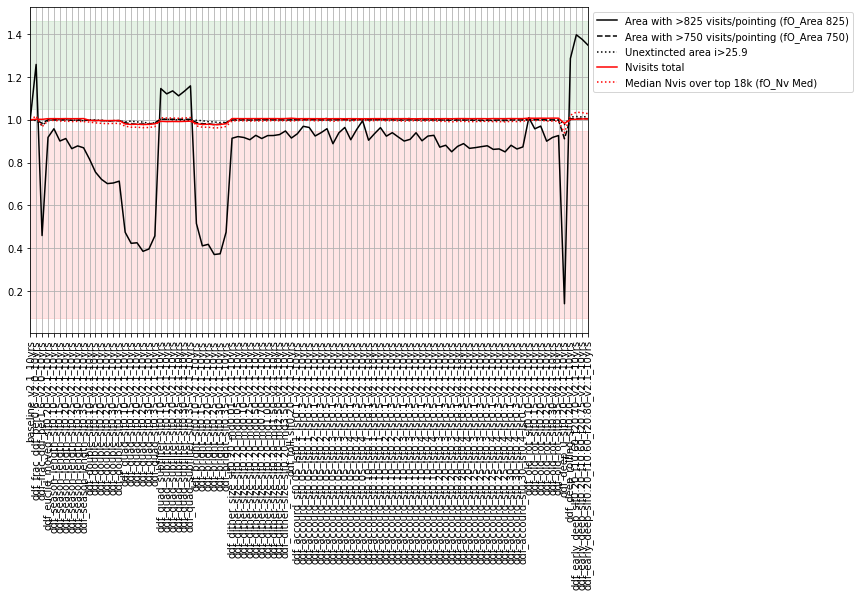

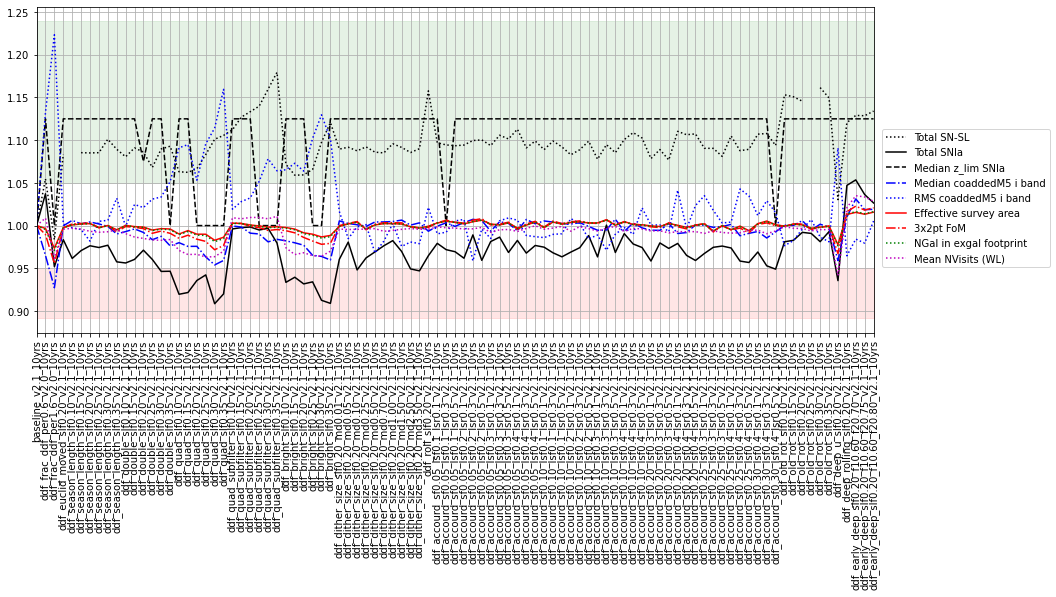

In [20]:
fam = [d for d in families.index if 'ddf' in d]
describe_family(fam)

---
**ddf double** : This family cuts the individual DDF sequences in half, resulting in brighter single night coadded depths, but a shorter interval of nights between visits. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_double_slf0.10_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.10",10139.51,16846.30,2076416.0,829.0,54.0,68.0,177.0,180.0,157.0,163.0
ddf_double_slf0.15_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.15",9390.86,16822.80,2074408.0,826.0,53.0,67.0,176.0,179.0,157.0,163.0
ddf_double_slf0.20_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.20",8974.57,16812.73,2074875.0,824.0,53.0,67.0,176.0,179.0,156.0,163.0
ddf_double_slf0.25_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.25",8723.62,16753.98,2074021.0,823.0,53.0,67.0,176.0,178.0,156.0,162.0
ddf_double_slf0.30_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.30",8758.87,16782.52,2074785.0,824.0,53.0,67.0,176.0,178.0,156.0,162.0
ddf_double_slf0.35_v2.1_10yrs,"Shorter (1/2) DDF sequences, season length fraction 0.35",8866.30,16774.96,2074848.0,824.0,53.0,67.0,176.0,178.0,156.0,162.0


---
**ddf quad** : This family cuts the individual DDF sequences by four, resulting in brighter single night coadded depths, but an even shorter interval of nights between visits.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_quad_slf0.10_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.10",5892.68,16675.93,2041518.0,813.0,52.0,67.0,173.0,176.0,154.0,160.0
ddf_quad_slf0.15_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.15",5250.62,16743.91,2036950.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.20_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.20",5281.67,16673.41,2038440.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.25_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.25",4783.13,16671.73,2035980.0,807.0,52.0,66.0,173.0,175.0,153.0,159.0
ddf_quad_slf0.30_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.30",4919.94,16553.39,2037701.0,808.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_quad_slf0.35_v2.1_10yrs,"Shorter (1/4) DDF sequences, season length fraction 0.35",5682.86,16612.14,2042853.0,811.0,52.0,66.0,174.0,176.0,154.0,160.0


---
**ddf quad subfilter** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. However, here only some filters are used in each DDF sequence, alternating between active filters on different nights.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_quad_subfilter_slf0.10_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.10",14253.72,16889.11,2067093.0,846.0,54.0,69.0,182.0,183.0,161.0,167.0
ddf_quad_subfilter_slf0.15_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.15",13943.19,16884.91,2064387.0,845.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.20_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.20",14117.76,16854.69,2065407.0,845.0,54.0,69.0,181.0,183.0,160.0,166.0
ddf_quad_subfilter_slf0.25_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.25",13831.56,16835.39,2064822.0,844.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.30_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.30",14104.33,16811.89,2066396.0,845.0,54.0,69.0,181.0,183.0,160.0,167.0
ddf_quad_subfilter_slf0.35_v2.1_10yrs,"Shorter DDF sequences with subsets of the filters, season length fraction 0.35",14408.99,16819.44,2068666.0,847.0,54.0,69.0,182.0,184.0,160.0,167.0


---
**ddf bright** : Similar to the ddf quad family, the sequences for individual DDFs are cut shorter by about 1/4 compared to baseline. In this family, the m5 limits for scheduling visits are relaxed, resulting in visits running more consistently throughout the lunar cycle even into bright time. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_bright_slf0.10_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.10",6401.29,16804.34,2044360.0,814.0,53.0,67.0,174.0,177.0,154.0,160.0
ddf_bright_slf0.15_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.15",5102.91,16773.28,2035970.0,809.0,52.0,66.0,173.0,175.0,153.0,160.0
ddf_bright_slf0.20_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.20",5191.03,16700.26,2039002.0,809.0,52.0,66.0,173.0,176.0,153.0,159.0
ddf_bright_slf0.25_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.25",4598.49,16672.57,2034445.0,806.0,52.0,66.0,172.0,175.0,152.0,159.0
ddf_bright_slf0.30_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.30",4640.45,16618.85,2036705.0,807.0,52.0,66.0,172.0,175.0,153.0,159.0
ddf_bright_slf0.35_v2.1_10yrs,"DDF quad-style sequences running through bright time, season length fraction 0.35",5901.07,16648.23,2043294.0,812.0,52.0,66.0,174.0,176.0,154.0,160.0


---
**ddf deep universal** : This family uses longer and more frequent nightly sequences for the DDFs. These sequences are described in a DESC DDF paper, and are roughly 41 visits per night every night during the season. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_deep_u_slf0.20_v2.1_10yrs,DESC deep universal DDF sequences,1735.66,16467.78,2046659.0,787.0,51.0,64.0,168.0,171.0,149.0,155.0


---
**ddf deep rolling** : This family is based on the `ddf deep universal` but adds a rolling cadence to the DDF fields. The rolling cadence simply observes each field for two seasons, and then stops, thus reducing the overall time requirement for the DDFs from the budget requested in `ddf deep universal`. This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_deep_rolling_slf0.20_v2.1_10yrs,"DESC deep universal sequences, with rolling - each DDF observed for 2 seasons",16001.13,17062.0,2085627.0,856.0,56.0,70.0,183.0,185.0,162.0,169.0


---
**ddf early deep** : This family reduces the overall number of DDFs to 3; XMM-LSS, COSMOS, and the double pointing EDFS. A deep nightly sequence and fast cadence is requested on these few fields.This family uses pre-scheduled DDF visits.  
**version**: 2.1  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
ddf_early_deep_slf0.20_f10.60_f20.70_v2.1_10yrs,DESC early deep rolling DDF cadences - z complete .70,17380.09,17103.13,2087518.0,868.0,56.0,71.0,186.0,188.0,165.0,171.0
ddf_early_deep_slf0.20_f10.60_f20.75_v2.1_10yrs,DESC early deep rolling DDF cadences - z complete .75,17109.84,17066.20,2090513.0,866.0,56.0,71.0,185.0,188.0,164.0,171.0
ddf_early_deep_slf0.20_f10.60_f20.80_v2.1_10yrs,DESC early deep rolling DDF cadences - z complete .80,16764.89,17107.32,2090831.0,862.0,56.0,71.0,184.0,187.0,164.0,170.0


metric,Median coaddedM5 i band,RMS coaddedM5 i band,Effective survey area,3x2pt FoM,NGal in exgal footprint,Mean NVisits (WL),Total SNIa,Median z_lim SNIa,Total SN-SL
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.200,7.748698
ddf_double_slf0.10_v2.1_10yrs,26.217604,0.125599,16846.302047,38.516942,4.610632e+09,185.162365,24019.505,0.225,8.373073
ddf_double_slf0.15_v2.1_10yrs,26.220731,0.122440,16822.801825,38.480128,4.604707e+09,184.428807,24124.705,0.225,8.453607
ddf_double_slf0.20_v2.1_10yrs,26.216611,0.122879,16812.730301,38.424028,4.601495e+09,184.114617,24396.048,0.215,8.415528
ddf_double_slf0.25_v2.1_10yrs,26.208087,0.121696,16753.979746,38.210367,4.584279e+09,183.786845,24123.458,0.225,8.276241
ddf_double_slf0.30_v2.1_10yrs,26.212055,0.121405,16782.515730,38.313036,4.591887e+09,183.705641,23770.921,0.225,8.443785
ddf_double_slf0.35_v2.1_10yrs,26.200866,0.119321,16774.962087,38.209305,4.588841e+09,183.874819,23776.527,0.200,8.468793
ddf_quad_slf0.10_v2.1_10yrs,26.204582,0.114995,16675.925437,37.984620,4.562154e+09,181.482812,23099.209,0.225,8.236984
ddf_quad_slf0.15_v2.1_10yrs,26.200265,0.114600,16743.908222,38.125207,4.579373e+09,180.589474,23150.469,0.225,8.231598


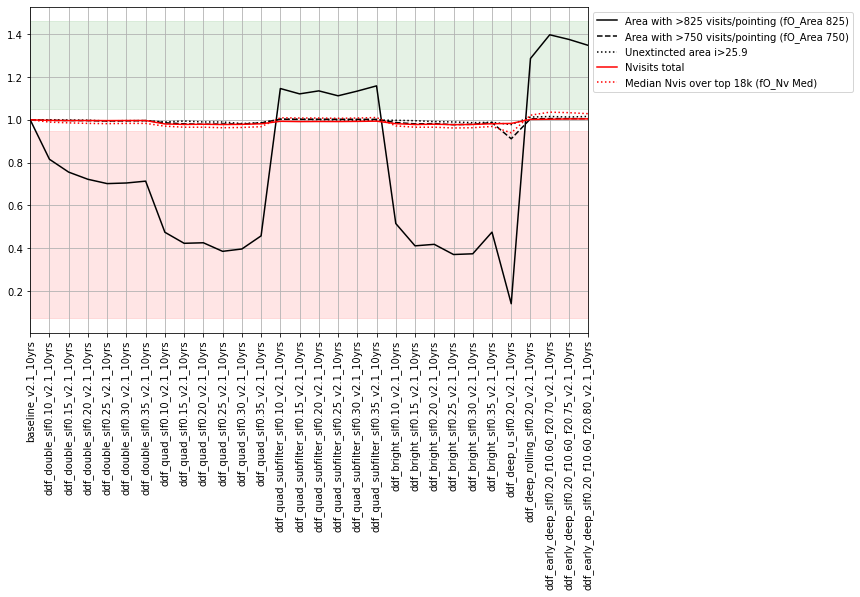

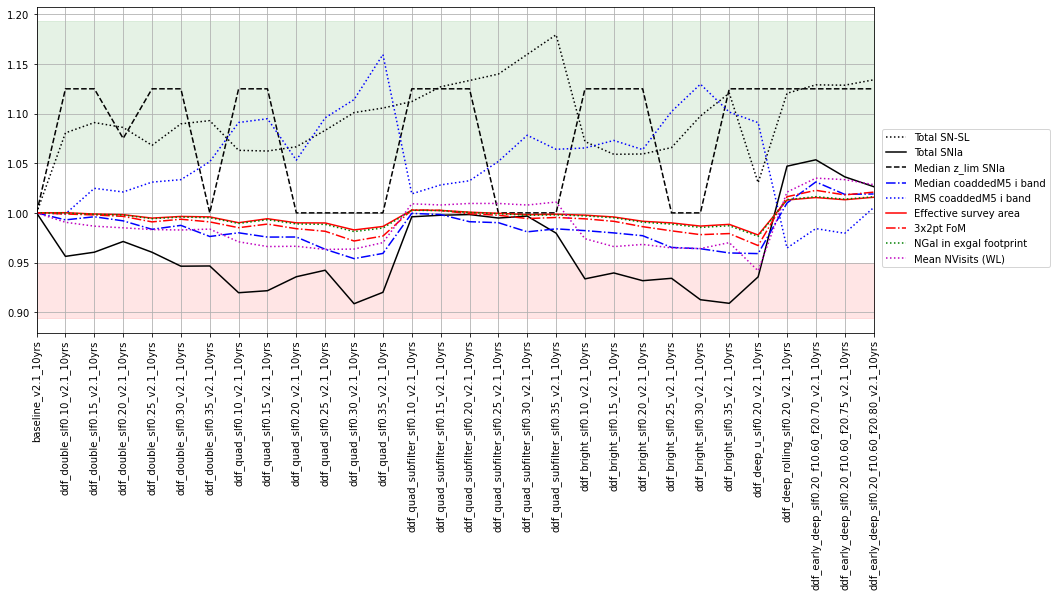

In [23]:
fam = ['ddf double', 'ddf quad', 'ddf quad subfilter', 'ddf bright', 
       'ddf deep universal', 'ddf deep rolling', 'ddf early deep']
describe_family(fam)